## Data exploration SMARD energy data for Germany overall

1. Data exploration of consumption data
2. Data exploration of generation data
3. Combination of consumption and generation data
4. More exploration and creation of figures

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("../../data/raw/smard/smard_consumption_DE.csv", sep=";")
df2 = pd.read_csv("../../data/raw/smard/smard_generation_DE.csv", sep=";")

## Consumption data

In [39]:
df1.describe()

,Date,Start,End,Total (grid load) [MWh] Calculated resolutions,Residual load [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions
count,78888,78888,78888,78888,78888,78888
unique,3287,24,24,61088,64335,18888
top,"Oct 30, 2016",12:00 AM,1:00 AM,"45,937","34,007.25",0
freq,25,3287,3287,7,6,579


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Date                                               78888 non-null  object
 1   Start                                              78888 non-null  object
 2   End                                                78888 non-null  object
 3   Total (grid load) [MWh] Calculated resolutions     78888 non-null  object
 4   Residual load [MWh] Calculated resolutions         78888 non-null  object
 5   Hydro pumped storage [MWh] Calculated resolutions  78888 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [41]:
df1.head()

,Date,Start,End,Total (grid load) [MWh] Calculated resolutions,Residual load [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions
0,"Jan 1, 2015",12:00 AM,1:00 AM,"44,600.25","35,955.75",601.5
1,"Jan 1, 2015",1:00 AM,2:00 AM,"43,454.75","34,641",346.25
2,"Jan 1, 2015",2:00 AM,3:00 AM,"41,963.25","32,909.25",521.75
3,"Jan 1, 2015",3:00 AM,4:00 AM,"40,617.75","31,548","1,228.25"
4,"Jan 1, 2015",4:00 AM,5:00 AM,"39,936.75","30,773.5","1,821.5"


In [42]:
# Refactor the data
df1["date"] = pd.to_datetime(df1['Date'] + ' ' + df1['Start'], format='%b %d, %Y %I:%M %p')
df1 = df1.drop(columns=["Date", "Start", "End"])
df1 = df1.rename(columns={"Total (grid load) [MWh] Calculated resolutions": "load"})
df1 = df1[["date"] + ["load"]]
df1["load"] = df1["load"].str.replace(',', '').astype(float)
df1

,date,load
0,2015-01-01 00:00:00,44600.25
1,2015-01-01 01:00:00,43454.75
2,2015-01-01 02:00:00,41963.25
3,2015-01-01 03:00:00,40617.75
4,2015-01-01 04:00:00,39936.75
...,...,...
78883,2023-12-31 19:00:00,50254.75
78884,2023-12-31 20:00:00,47086.50
78885,2023-12-31 21:00:00,45238.50
78886,2023-12-31 22:00:00,44099.25


In [43]:
df1.describe()

,date,load
count,78888,78888.000000
mean,2019-07-02 12:05:15.972011008,56360.112254
min,2015-01-01 00:00:00,30909.000000
25%,2017-04-01 18:45:00,48133.375000
50%,2019-07-02 12:30:00,56045.625000
75%,2021-10-01 06:15:00,64691.625000
max,2023-12-31 23:00:00,81077.500000
std,NaN,10000.237611


## Energy generation data

In [44]:
df2.describe()

,Other renewable [MWh] Calculated resolutions
count,78888.000000
mean,160.234158
std,41.054754
min,50.250000
25%,131.000000
50%,157.000000
75%,191.000000
max,260.000000


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date                                               78888 non-null  object 
 1   Start                                              78888 non-null  object 
 2   End                                                78888 non-null  object 
 3   Biomass [MWh] Calculated resolutions               78888 non-null  object 
 4   Hydropower [MWh] Calculated resolutions            78888 non-null  object 
 5   Wind offshore [MWh] Calculated resolutions         78888 non-null  object 
 6   Wind onshore [MWh] Calculated resolutions          78888 non-null  object 
 7   Photovoltaics [MWh] Calculated resolutions         78888 non-null  object 
 8   Other renewable [MWh] Calculated resolutions       78888 non-null  float64
 9   Nuclea

In [46]:
df2.head()

,Date,Start,End,Biomass [MWh] Calculated resolutions,Hydropower [MWh] Calculated resolutions,Wind offshore [MWh] Calculated resolutions,Wind onshore [MWh] Calculated resolutions,Photovoltaics [MWh] Calculated resolutions,Other renewable [MWh] Calculated resolutions,Nuclear [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions
0,"Jan 1, 2015",12:00 AM,1:00 AM,"4,024.25","1,158.25",516.5,"8,128",0,133.0,"10,710.5","15,687.25","3,219.75","1,226.25","1,525.75","4,909.25"
1,"Jan 1, 2015",1:00 AM,2:00 AM,"3,982.75","1,188",516.25,"8,297.5",0,122.5,"11,086.25","15,321.75","2,351.25",870.75,"1,079.25","4,932.75"
2,"Jan 1, 2015",2:00 AM,3:00 AM,"4,019.5","1,139.25",514,"8,540",0,93.0,"11,026.25","14,817.5","2,227",809.5,787,"5,041.75"
3,"Jan 1, 2015",3:00 AM,4:00 AM,"4,040.75","1,122.5",517.75,"8,552",0,86.5,"11,027.75","14,075","2,339.75",821,287.75,"5,084"
4,"Jan 1, 2015",4:00 AM,5:00 AM,"4,037.75","1,112",519.75,"8,643.5",0,86.5,"10,962.25","14,115","2,461.5",831.25,346.75,"5,070.75"


In [47]:
# Refactor the data

df2["date"] = pd.to_datetime(df2['Date'] + ' ' + df2['Start'], format='%b %d, %Y %I:%M %p')
df2 = df2.drop(columns=["Date", "Start", "End"])
df2["wind_gen"] = df2["Wind offshore [MWh] Calculated resolutions"].str.replace(',', '').astype(float) + df2["Wind onshore [MWh] Calculated resolutions"].str.replace(',', '').astype(float)
df2 = df2.rename(columns={"Photovoltaics [MWh] Calculated resolutions": "solar_gen", "Hydro pumped storage [MWh] Calculated resolutions": "hydro_storage_gen"})
df2 = df2[["date", "wind_gen", "solar_gen"]]
df2["solar_gen"] = df2["solar_gen"].str.replace(',', '').astype(float)

In [48]:
# Combine consumption and generation data

df2 = df2.drop(columns=("date"))
df = pd.concat((df1, df2), axis=1)

#Convert to UTC time
df['date'] = df['date'].dt.tz_localize('Europe/Berlin', ambiguous='infer').dt.tz_convert('UTC')

# Convert to permanent utc+1 which is cet winter time.
df['date'] =  df['date'] + timedelta(hours=1) 
df


,date,load,wind_gen,solar_gen
0,2015-01-01 00:00:00+00:00,44600.25,8644.50,0.0
1,2015-01-01 01:00:00+00:00,43454.75,8813.75,0.0
2,2015-01-01 02:00:00+00:00,41963.25,9054.00,0.0
3,2015-01-01 03:00:00+00:00,40617.75,9069.75,0.0
4,2015-01-01 04:00:00+00:00,39936.75,9163.25,0.0
...,...,...,...,...
78883,2023-12-31 19:00:00+00:00,50254.75,35471.50,0.0
78884,2023-12-31 20:00:00+00:00,47086.50,36230.75,0.0
78885,2023-12-31 21:00:00+00:00,45238.50,36056.25,0.0
78886,2023-12-31 22:00:00+00:00,44099.25,36031.25,0.0


In [49]:
df.to_csv("./../../data/preproc/smard_data_DE.csv", index=False)
df.describe()

,load,wind_gen,solar_gen
count,78888.000000,78888.000000,78888.000000
mean,56360.112254,12686.029973,4961.646844
std,10000.237611,9861.741766,7743.779553
min,30909.000000,81.500000,0.000000
25%,48133.375000,4914.750000,0.000000
50%,56045.625000,9894.000000,147.500000
75%,64691.625000,18143.750000,7768.875000
max,81077.500000,52399.000000,40673.750000


### Exploration of data

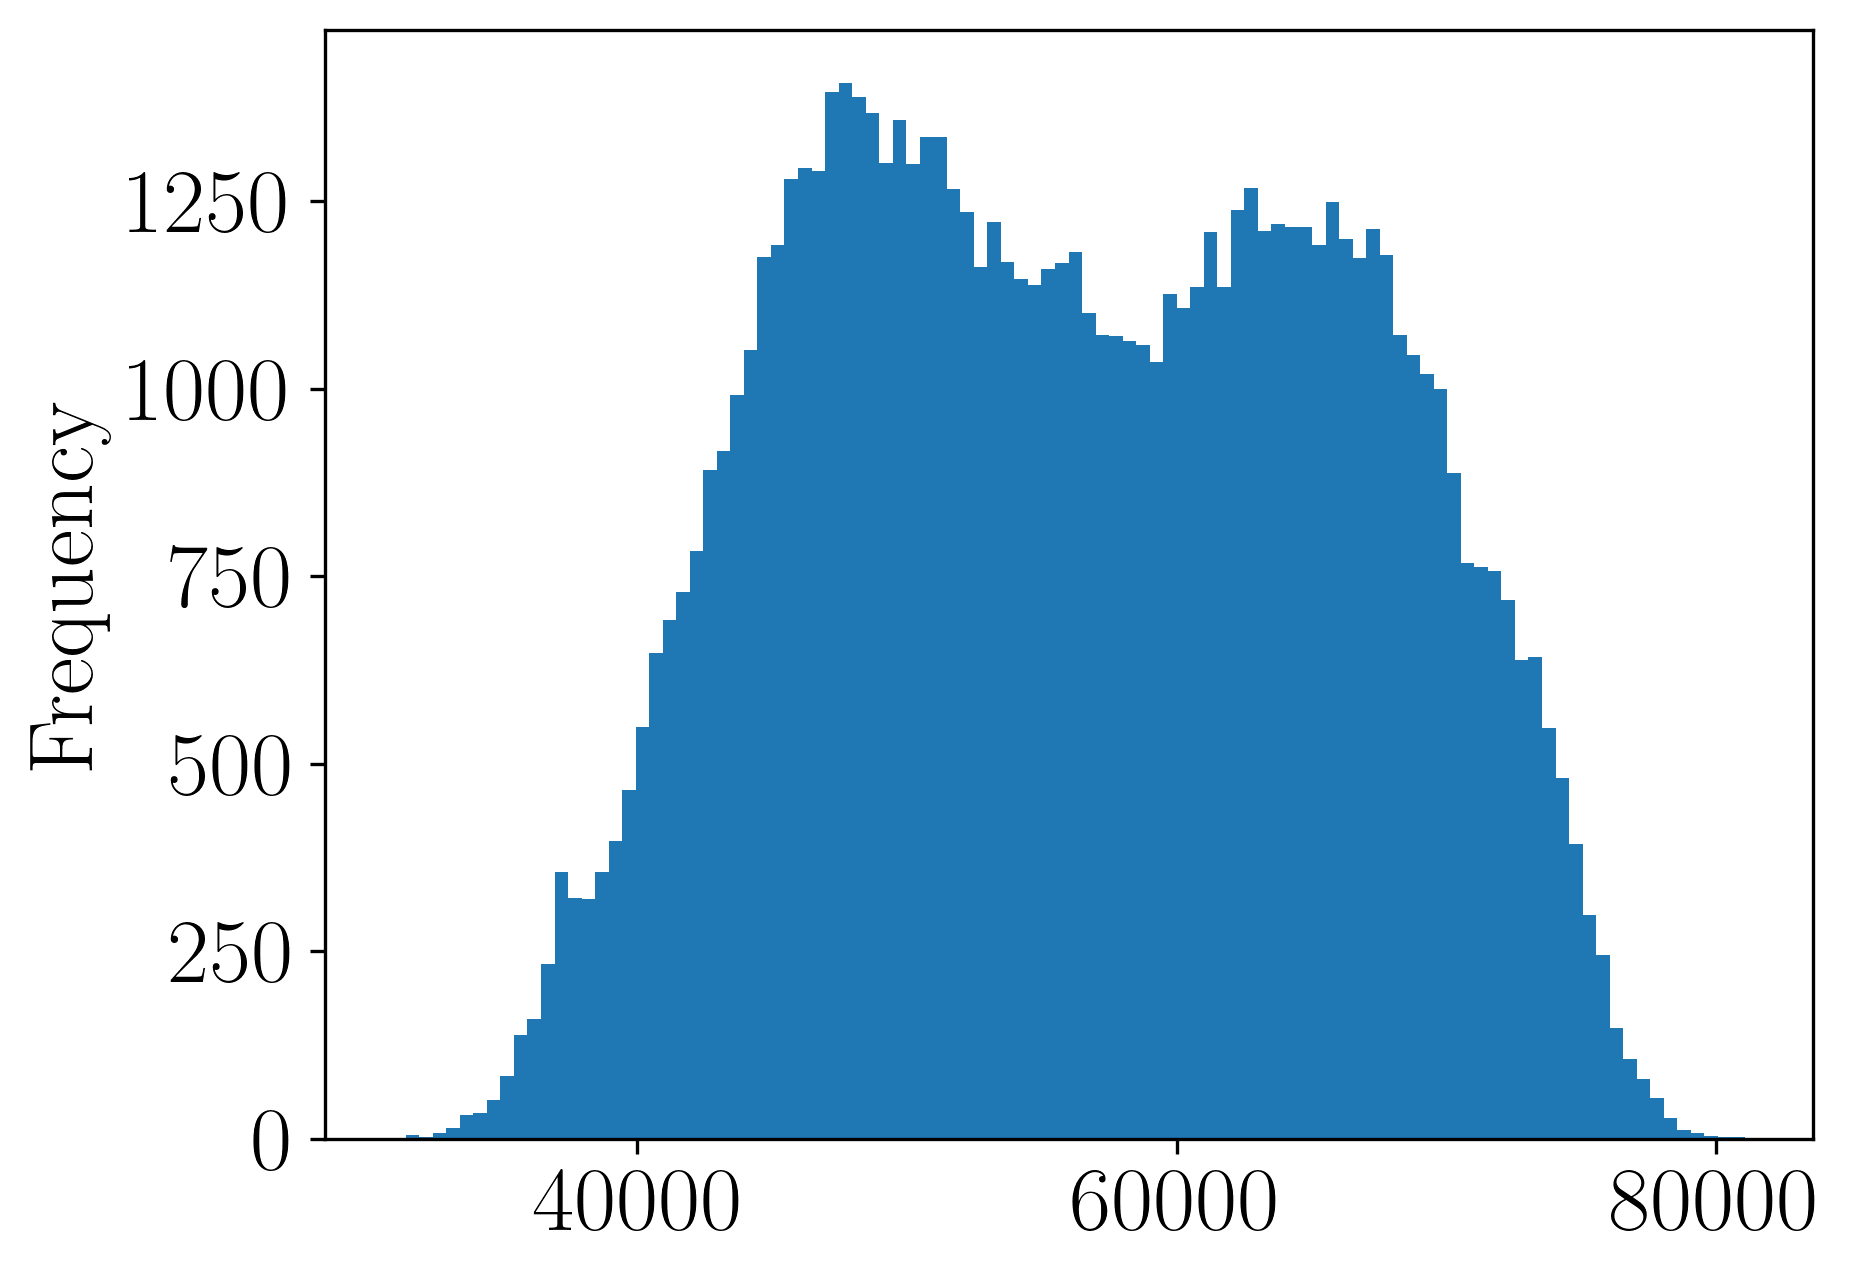

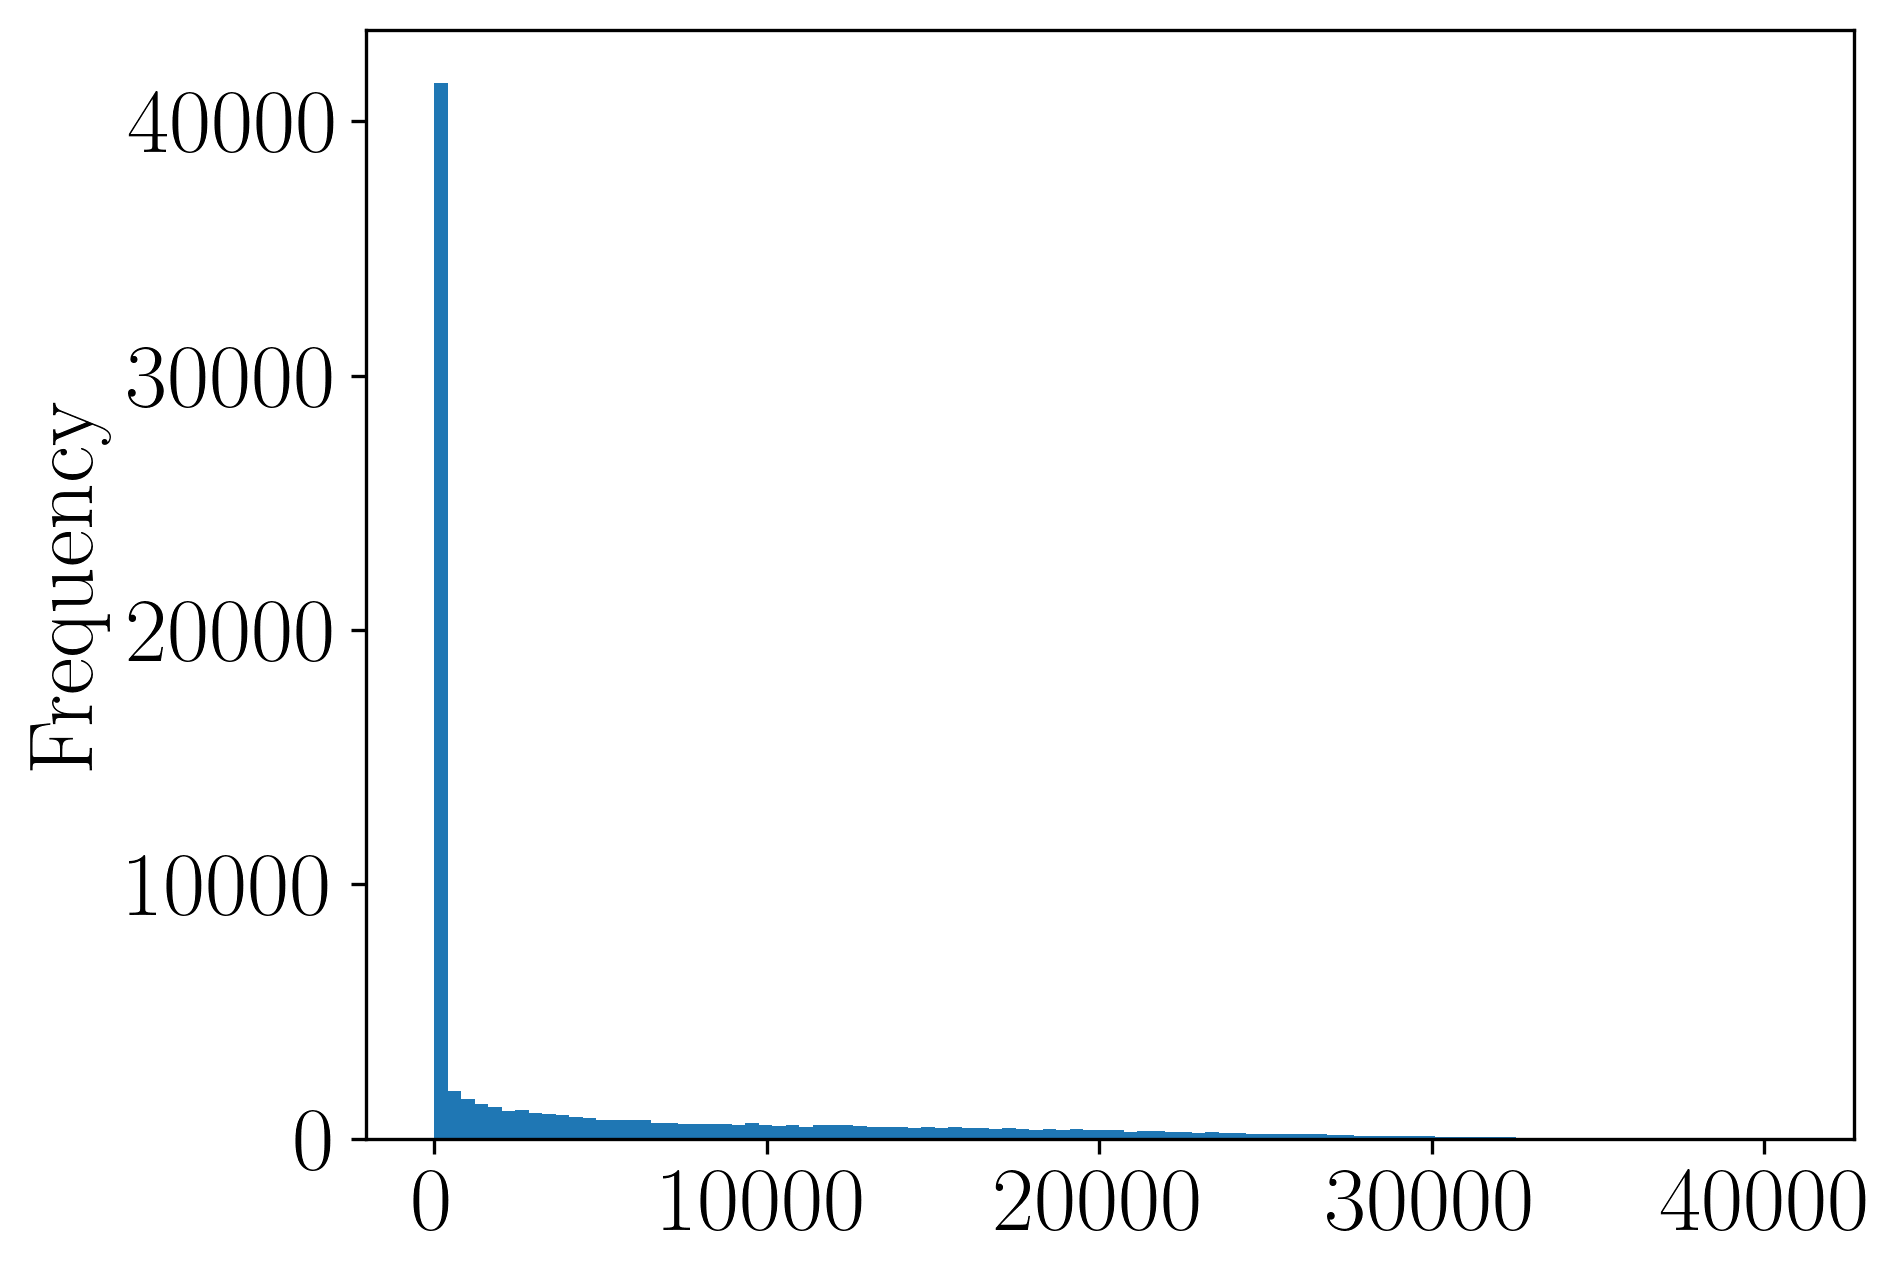

<Axes: ylabel='Frequency'>

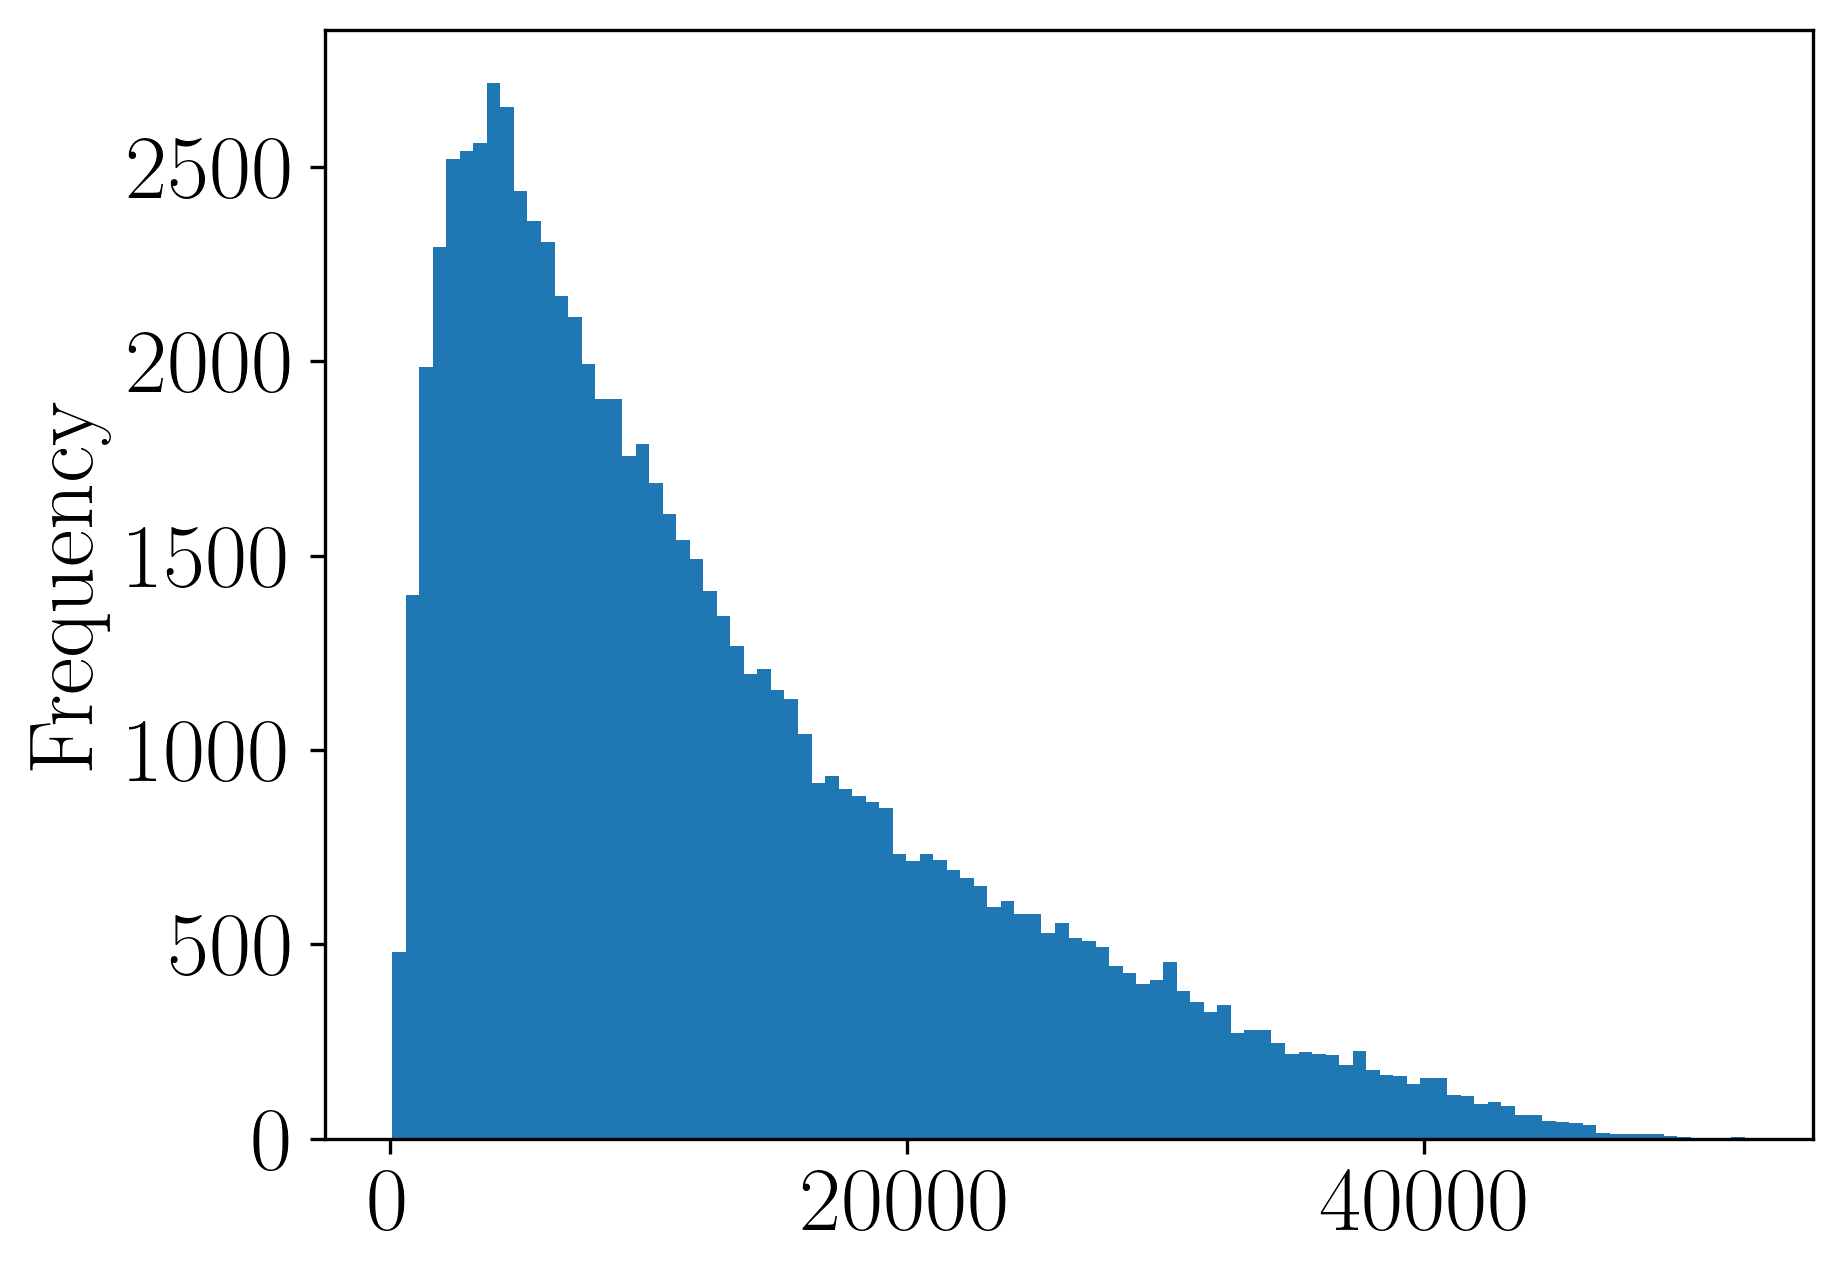

In [50]:
import matplotlib.pyplot as plt

df['load'].plot.hist(bins=100)
plt.show()
df['solar_gen'].plot.hist(bins=100)
plt.show()
df['wind_gen'].plot.hist(bins=100)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       78888 non-null  datetime64[ns, UTC]
 1   load       78888 non-null  float64            
 2   wind_gen   78888 non-null  float64            
 3   solar_gen  78888 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 2.4 MB


# Figure 2.6

In [52]:
df_average = df.copy()
#print(df.head())

#df.shape[0] = 500*24
df_average["dayofweek"] = df_average["date"].dt.dayofweek
df_average["hour"] = df_average["date"].dt.hour
df_average = df_average.drop(columns=["date"])

df_std = df_average.groupby(["dayofweek", "hour"]).std().reset_index()
df_average = df_average.groupby(["dayofweek", "hour"]).mean().reset_index()
print(df_std)


df_average = df_average.rename(columns={"load": "load_avg", "wind_gen": "wind_gen_avg", "solar_gen": "solar_gen_avg"})
df_std = df_std.rename(columns={"load": "load_std", "wind_gen": "wind_gen_std", "solar_gen": "solar_gen_std"})
# Repeat the rows 168 * n times
df_average = pd.concat((df_average[24*3:], df_average[:24*3]), axis=0)
df_std = pd.concat((df_std[24*3:], df_std[:24*3]), axis=0)

#print(df_average)

df_average.drop(columns=["dayofweek", "hour"], inplace=True)
df_std.drop(columns=["dayofweek", "hour"], inplace=True)

repeated_df = pd.DataFrame(np.tile(df_average.values, (72, 1)), columns=df_average.columns)
repeated_df_std = pd.DataFrame(np.tile(df_std.values, (72, 1)), columns=df_std.columns)
repeated_df

     dayofweek  hour         load      wind_gen   solar_gen
0            0     0  4487.788676   9317.086273    0.000000
1            0     1  4191.864912   9250.005492    0.000000
2            0     2  3967.623419   9202.369981    0.000000
3            0     3  3785.146034   9201.856214    1.117154
4            0     4  3765.052683   9264.713252   98.595817
..         ...   ...          ...           ...         ...
163          6    19  5275.019389  10205.458299  435.071280
164          6    20  4496.634447  10098.729642   30.087780
165          6    21  4171.861554   9930.352640    0.133827
166          6    22  5177.920833   9614.098175    0.000000
167          6    23  4916.607772   9450.327328    0.000000

[168 rows x 5 columns]


,load_avg,wind_gen_avg,solar_gen_avg
0,48329.741489,13638.564894,0.000000
1,47018.053191,13430.974468,0.000000
2,46730.554255,13247.531915,0.000000
3,47463.659574,13124.048936,0.351064
4,49746.431915,13050.029787,46.051596
...,...,...,...
12091,64146.376333,13275.574094,252.453625
12092,61084.015458,13713.487207,13.140192
12093,57736.901919,13924.178038,0.055970
12094,54108.265458,13889.783049,0.041045


In [53]:
repeated_df_std

,load_std,wind_gen_std,solar_gen_std
0,4708.731389,9713.954423,0.000000
1,4363.288506,9660.338060,0.000000
2,4055.321462,9614.481971,0.000000
3,3936.275499,9583.416839,1.107086
4,3879.655408,9581.641324,99.739481
...,...,...,...
12091,6381.456574,10120.910245,446.235829
12092,5643.283161,10161.963211,31.909610
12093,5398.333410,10042.649038,0.995147
12094,5775.875338,9821.899700,0.877390


In [54]:
start = 24*365+24*31

df_cropped = df[start : start+24*14]
df_cropped[['load', 'wind_gen', 'solar_gen']] = df_cropped[['load', 'wind_gen', 'solar_gen']] / 1000
df_avg_cropped = repeated_df[start: start+24*14] / 1000
df_std_cropped = repeated_df_std[start: start+24*14] / 1000
print(df_cropped.shape)
print(df_avg_cropped.shape)
df_cropped

(336, 4)
(336, 3)


/var/folders/m4/89q121bx0sxd404czvsn99kh0000gn/T/ipykernel_46828/1894807575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cropped[['load', 'wind_gen', 'solar_gen']] = df_cropped[['load', 'wind_gen', 'solar_gen']] / 1000


,date,load,wind_gen,solar_gen
9504,2016-02-01 00:00:00+00:00,46.77450,14.18175,0.0
9505,2016-02-01 01:00:00+00:00,45.23075,13.75300,0.0
9506,2016-02-01 02:00:00+00:00,44.56475,13.18400,0.0
9507,2016-02-01 03:00:00+00:00,45.22825,12.45950,0.0
9508,2016-02-01 04:00:00+00:00,47.23750,11.97575,0.0
...,...,...,...,...
9835,2016-02-14 19:00:00+00:00,58.75625,10.27525,0.0
9836,2016-02-14 20:00:00+00:00,56.39550,10.34250,0.0
9837,2016-02-14 21:00:00+00:00,54.89675,10.18550,0.0
9838,2016-02-14 22:00:00+00:00,54.84525,9.80775,0.0


['load', 'wind_gen', 'solar_gen']


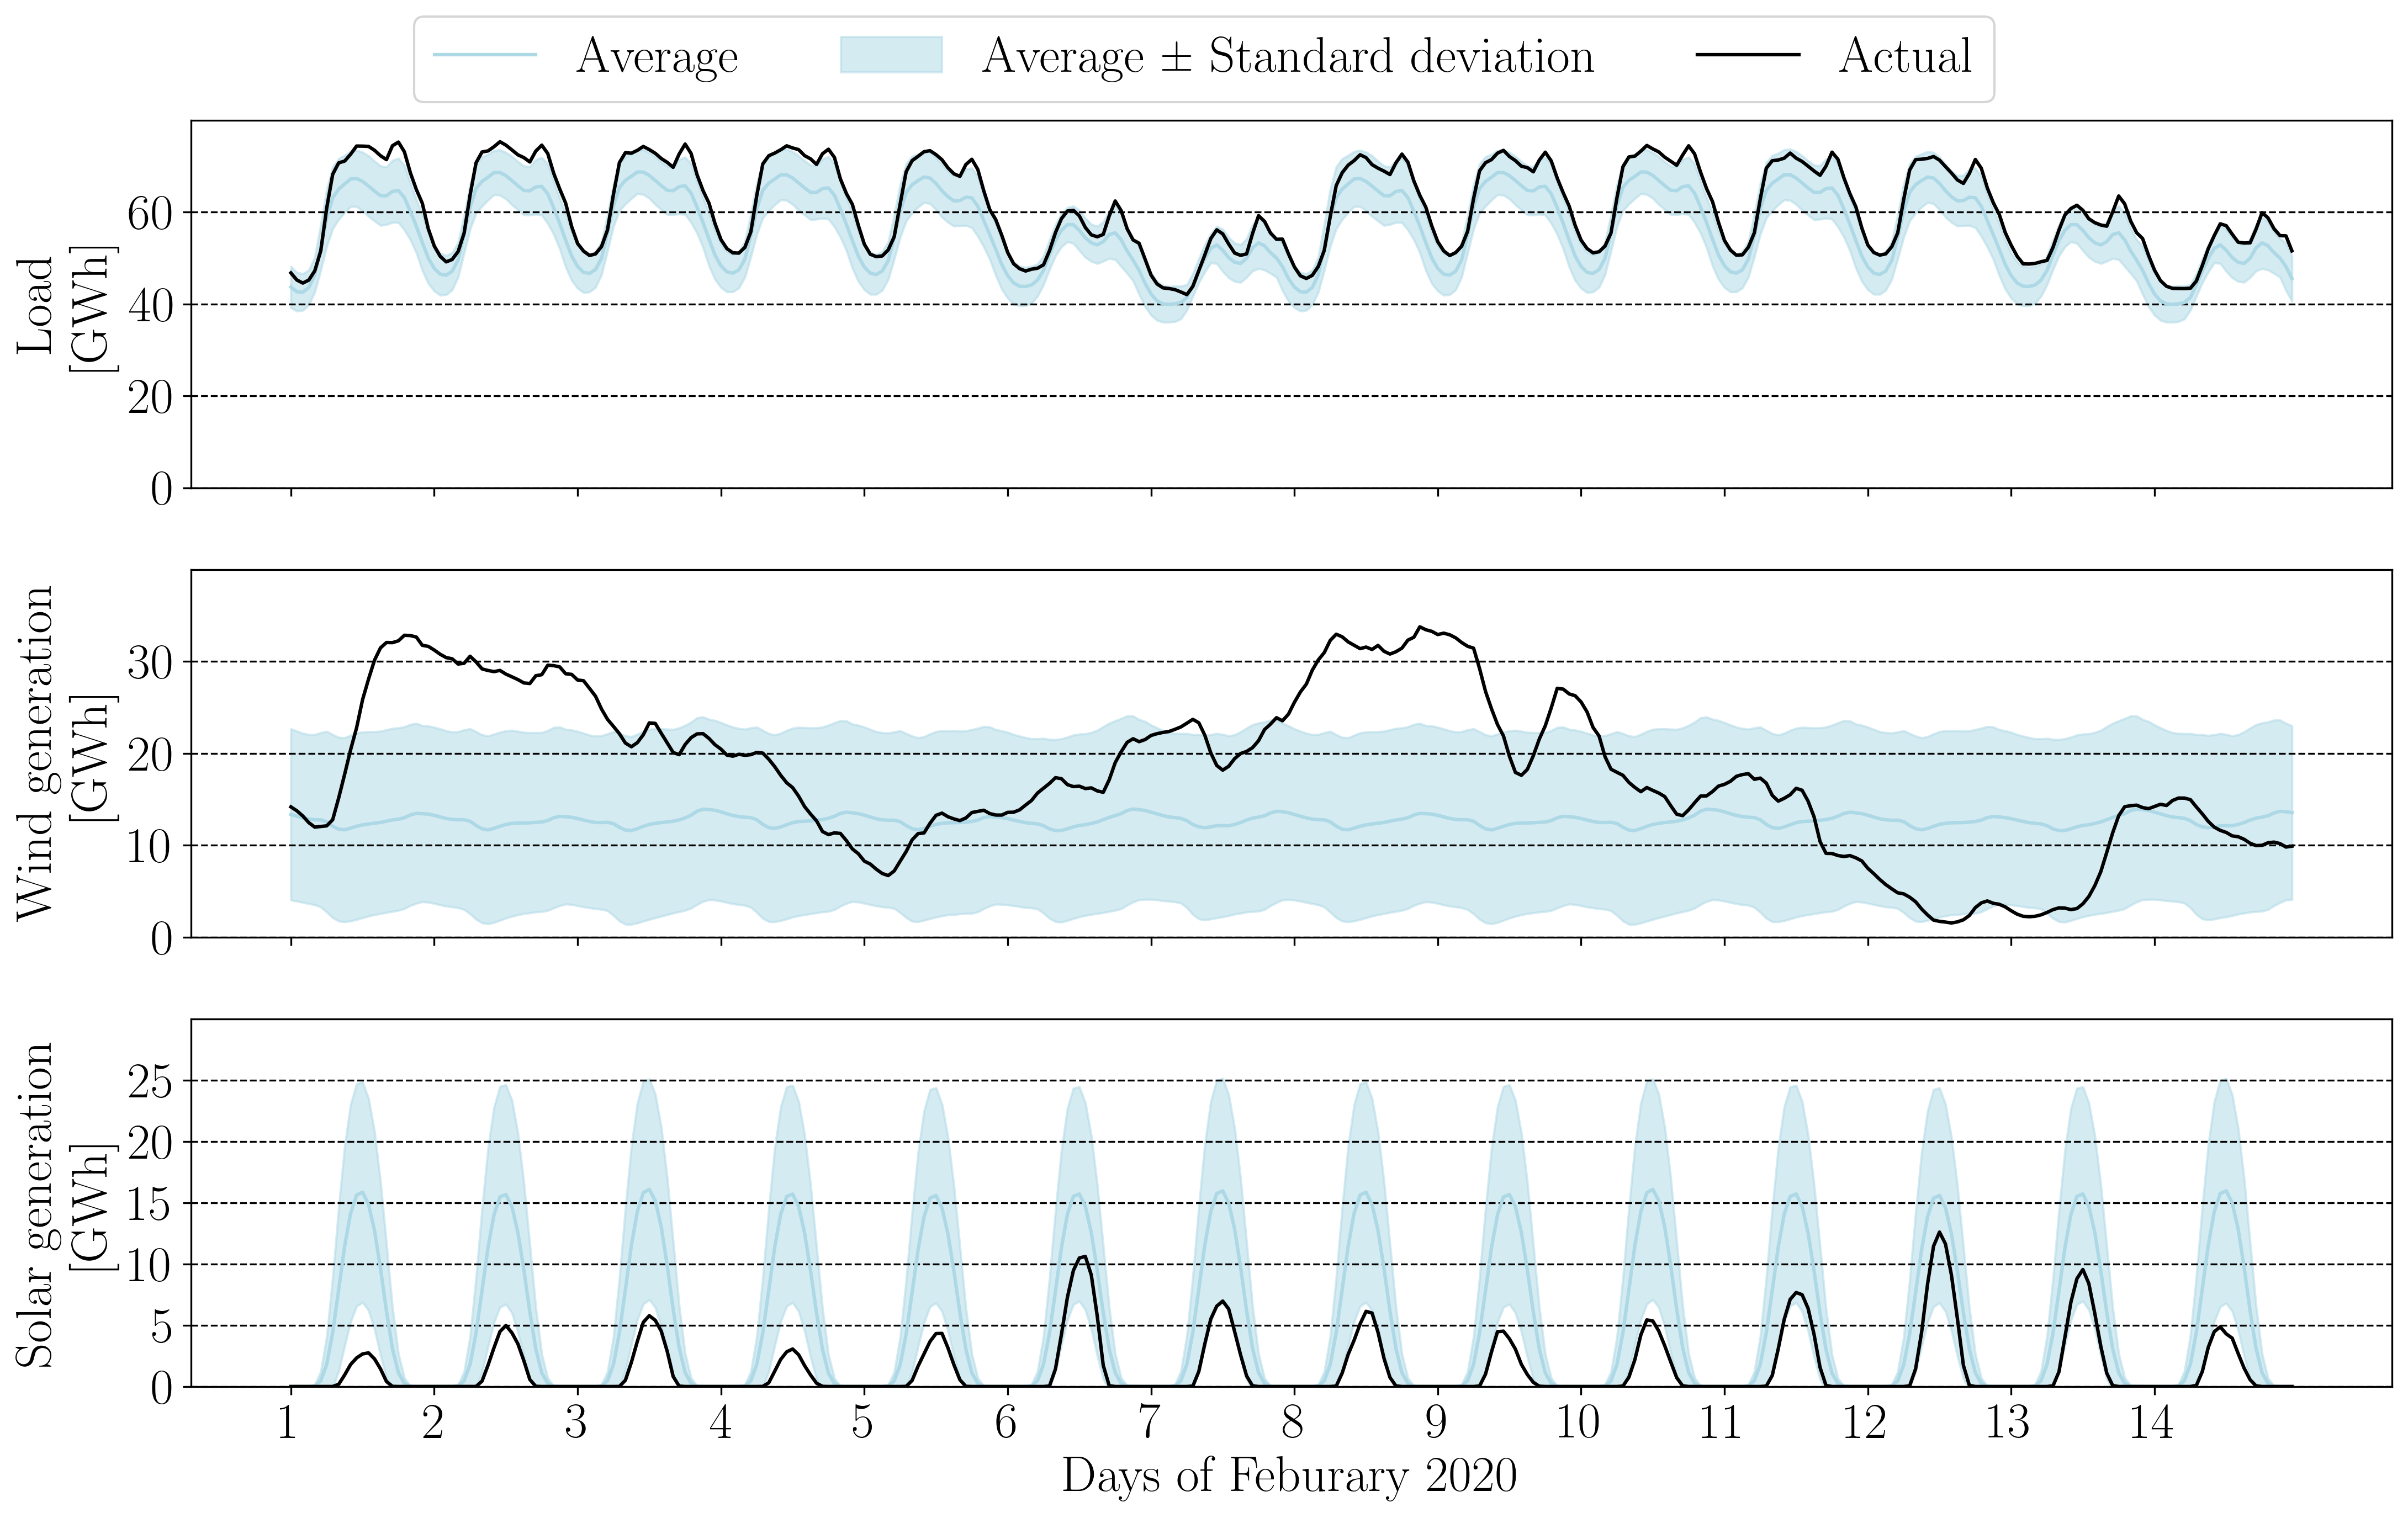

In [55]:
keys = list(df.drop(columns="date").columns)
print(keys)
labels = keys
axis_labels = ["Load \n [GWh]", "Wind generation \n [GWh]", "Solar generation \n [GWh]"]

fig, axs = plt.subplots(3,1, figsize=(15,9), sharex=True)

for i, (key, label) in enumerate(zip(keys, labels)):
    axs[i].plot(df_cropped['date'], df_avg_cropped[key+"_avg"], label="Average", color='lightblue')
    axs[i].fill_between(df_cropped['date'], df_avg_cropped[key+"_avg"]-df_std_cropped[key+"_std"], df_avg_cropped[key+"_avg"]+df_std_cropped[key+"_std"], alpha=0.5, color='lightblue')
    axs[i].plot(df_cropped['date'], df_cropped[key], color='black')
    
    axs[i].set_ylabel(axis_labels[i])

# One legend for all subplots
fig.legend(["Average", "Average ± Standard deviation", "Actual"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)


axs[0].set_ylim(0, 80)
axs[0].set_yticks(np.arange(0, 80, 20))

axs[1].set_ylim(0, 40)
axs[1].set_yticks(np.arange(0, 40, 10))

axs[2].set_ylim(0, 30)
axs[2].set_yticks(np.arange(0, 30, 5))

axs[0].grid(True, axis='y', color='black', linestyle='--')
axs[1].grid(True, axis='y', color='black', linestyle='--')
axs[2].grid(True, axis='y', color='black', linestyle='--')

plt.xticks(df_cropped['date'].dt.date.unique(), df_cropped['date'].dt.day.unique())
plt.xlabel("Days of Feburary 2020")
#plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Figure 3.2

(39445,)
(39445,)
(39445,)


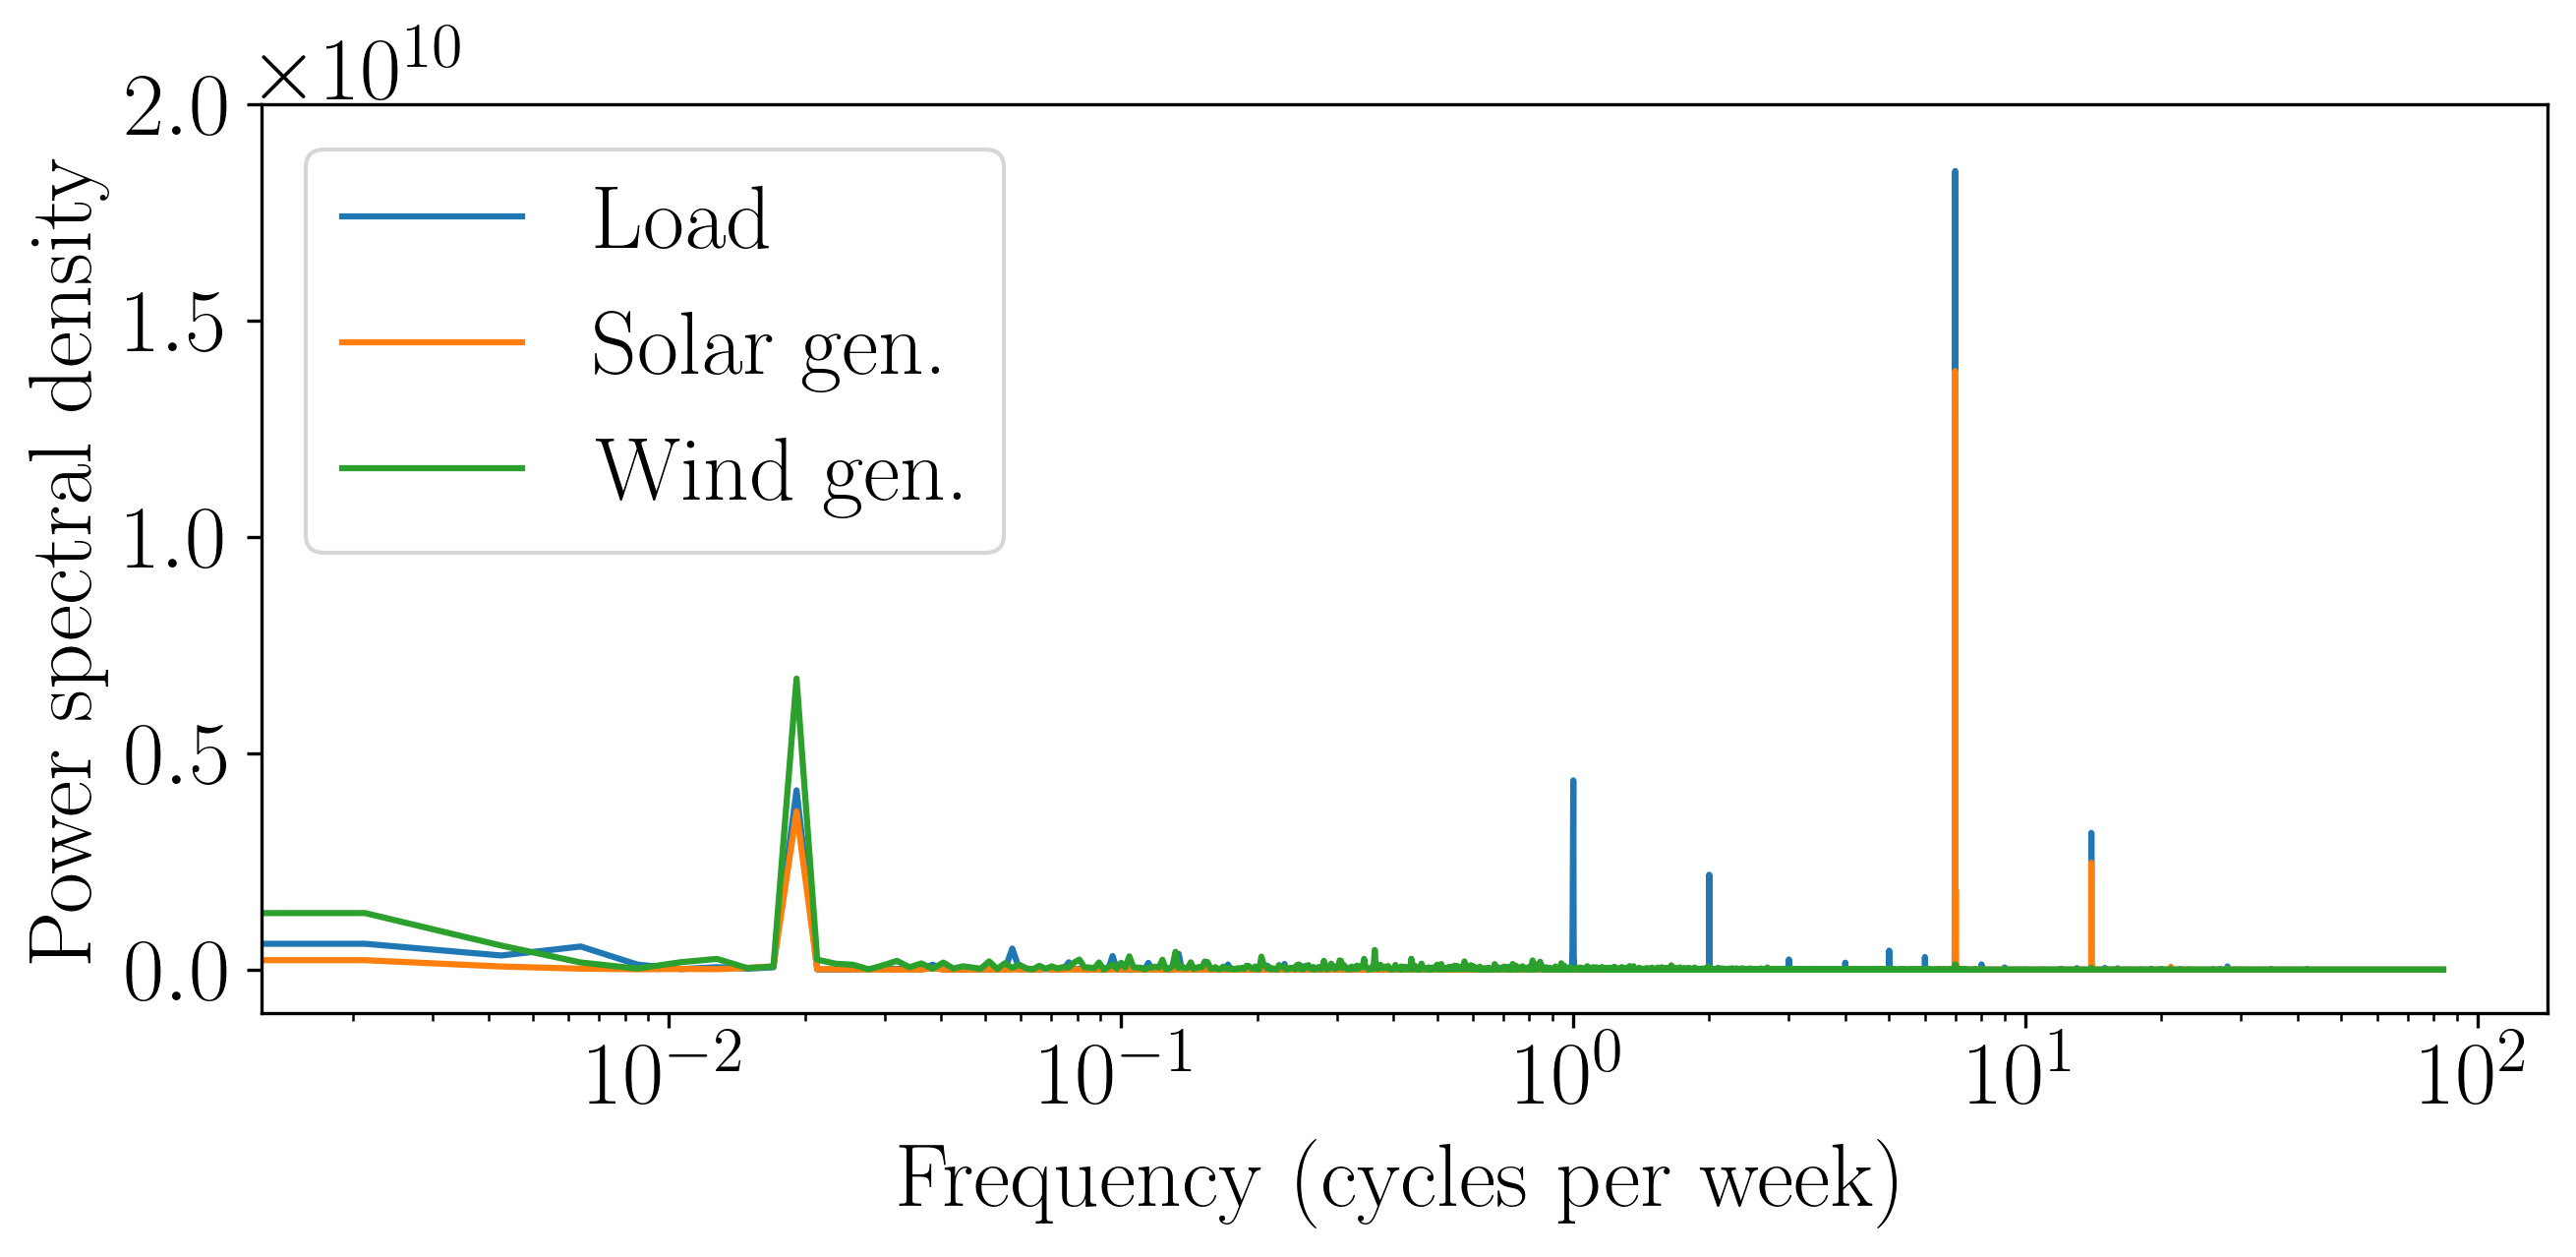

In [61]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams.update({'font.size': 22})

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

fig, ax = plt.subplots(1, 1, figsize=(10, 4), sharex=True, sharey=True)
# Assuming df["load"].values is your time series data

for i, column in enumerate(["load", "solar_gen", "wind_gen"]):

    data = df[column].values
    headers = {"load": "Load", "solar_gen": "Solar gen.", "wind_gen": "Wind gen."}

    # Sampling frequency (fs) is 1 hour^-1 since the data is hourly
    fs = 24*7

    # Calculate the periodogram (frequencies and power spectral density)
    frequencies, psd = periodogram(data, fs=fs)
    print(frequencies.shape)
    # Plotting the periodogram
    
    #plt.plot(frequencies[:10000], psd[:10000])
    ax.plot(frequencies, psd, label=headers[column], alpha=1)
    
    
    ax.set_ylabel('{}'.format(headers[column]))
    
    ax.set_xscale('log')
    ax.set_ylim(-0.1e10,2e10)

ax.legend()
ax.set_xlabel('Frequency (cycles per week)')
ax.set_ylabel('Power spectral density')
plt.show()

# One can clearly see the 
# (1) yearly pattern at ~0.02 cycles per week
# (2) weekly pattern at 1 cycles per week
# (3) daily pattern at 7 cycles per week
# (4) half-daily pattern at 14 cycles per week

# load has (1) to (4) and a weird pattern at twice a week
# solar_gen has (1), (3) and (4)
# wind_gen only has (1)


# Additional analysis

In [ ]:
print(df[['load', 'solar_gen', 'wind_gen']].corr())

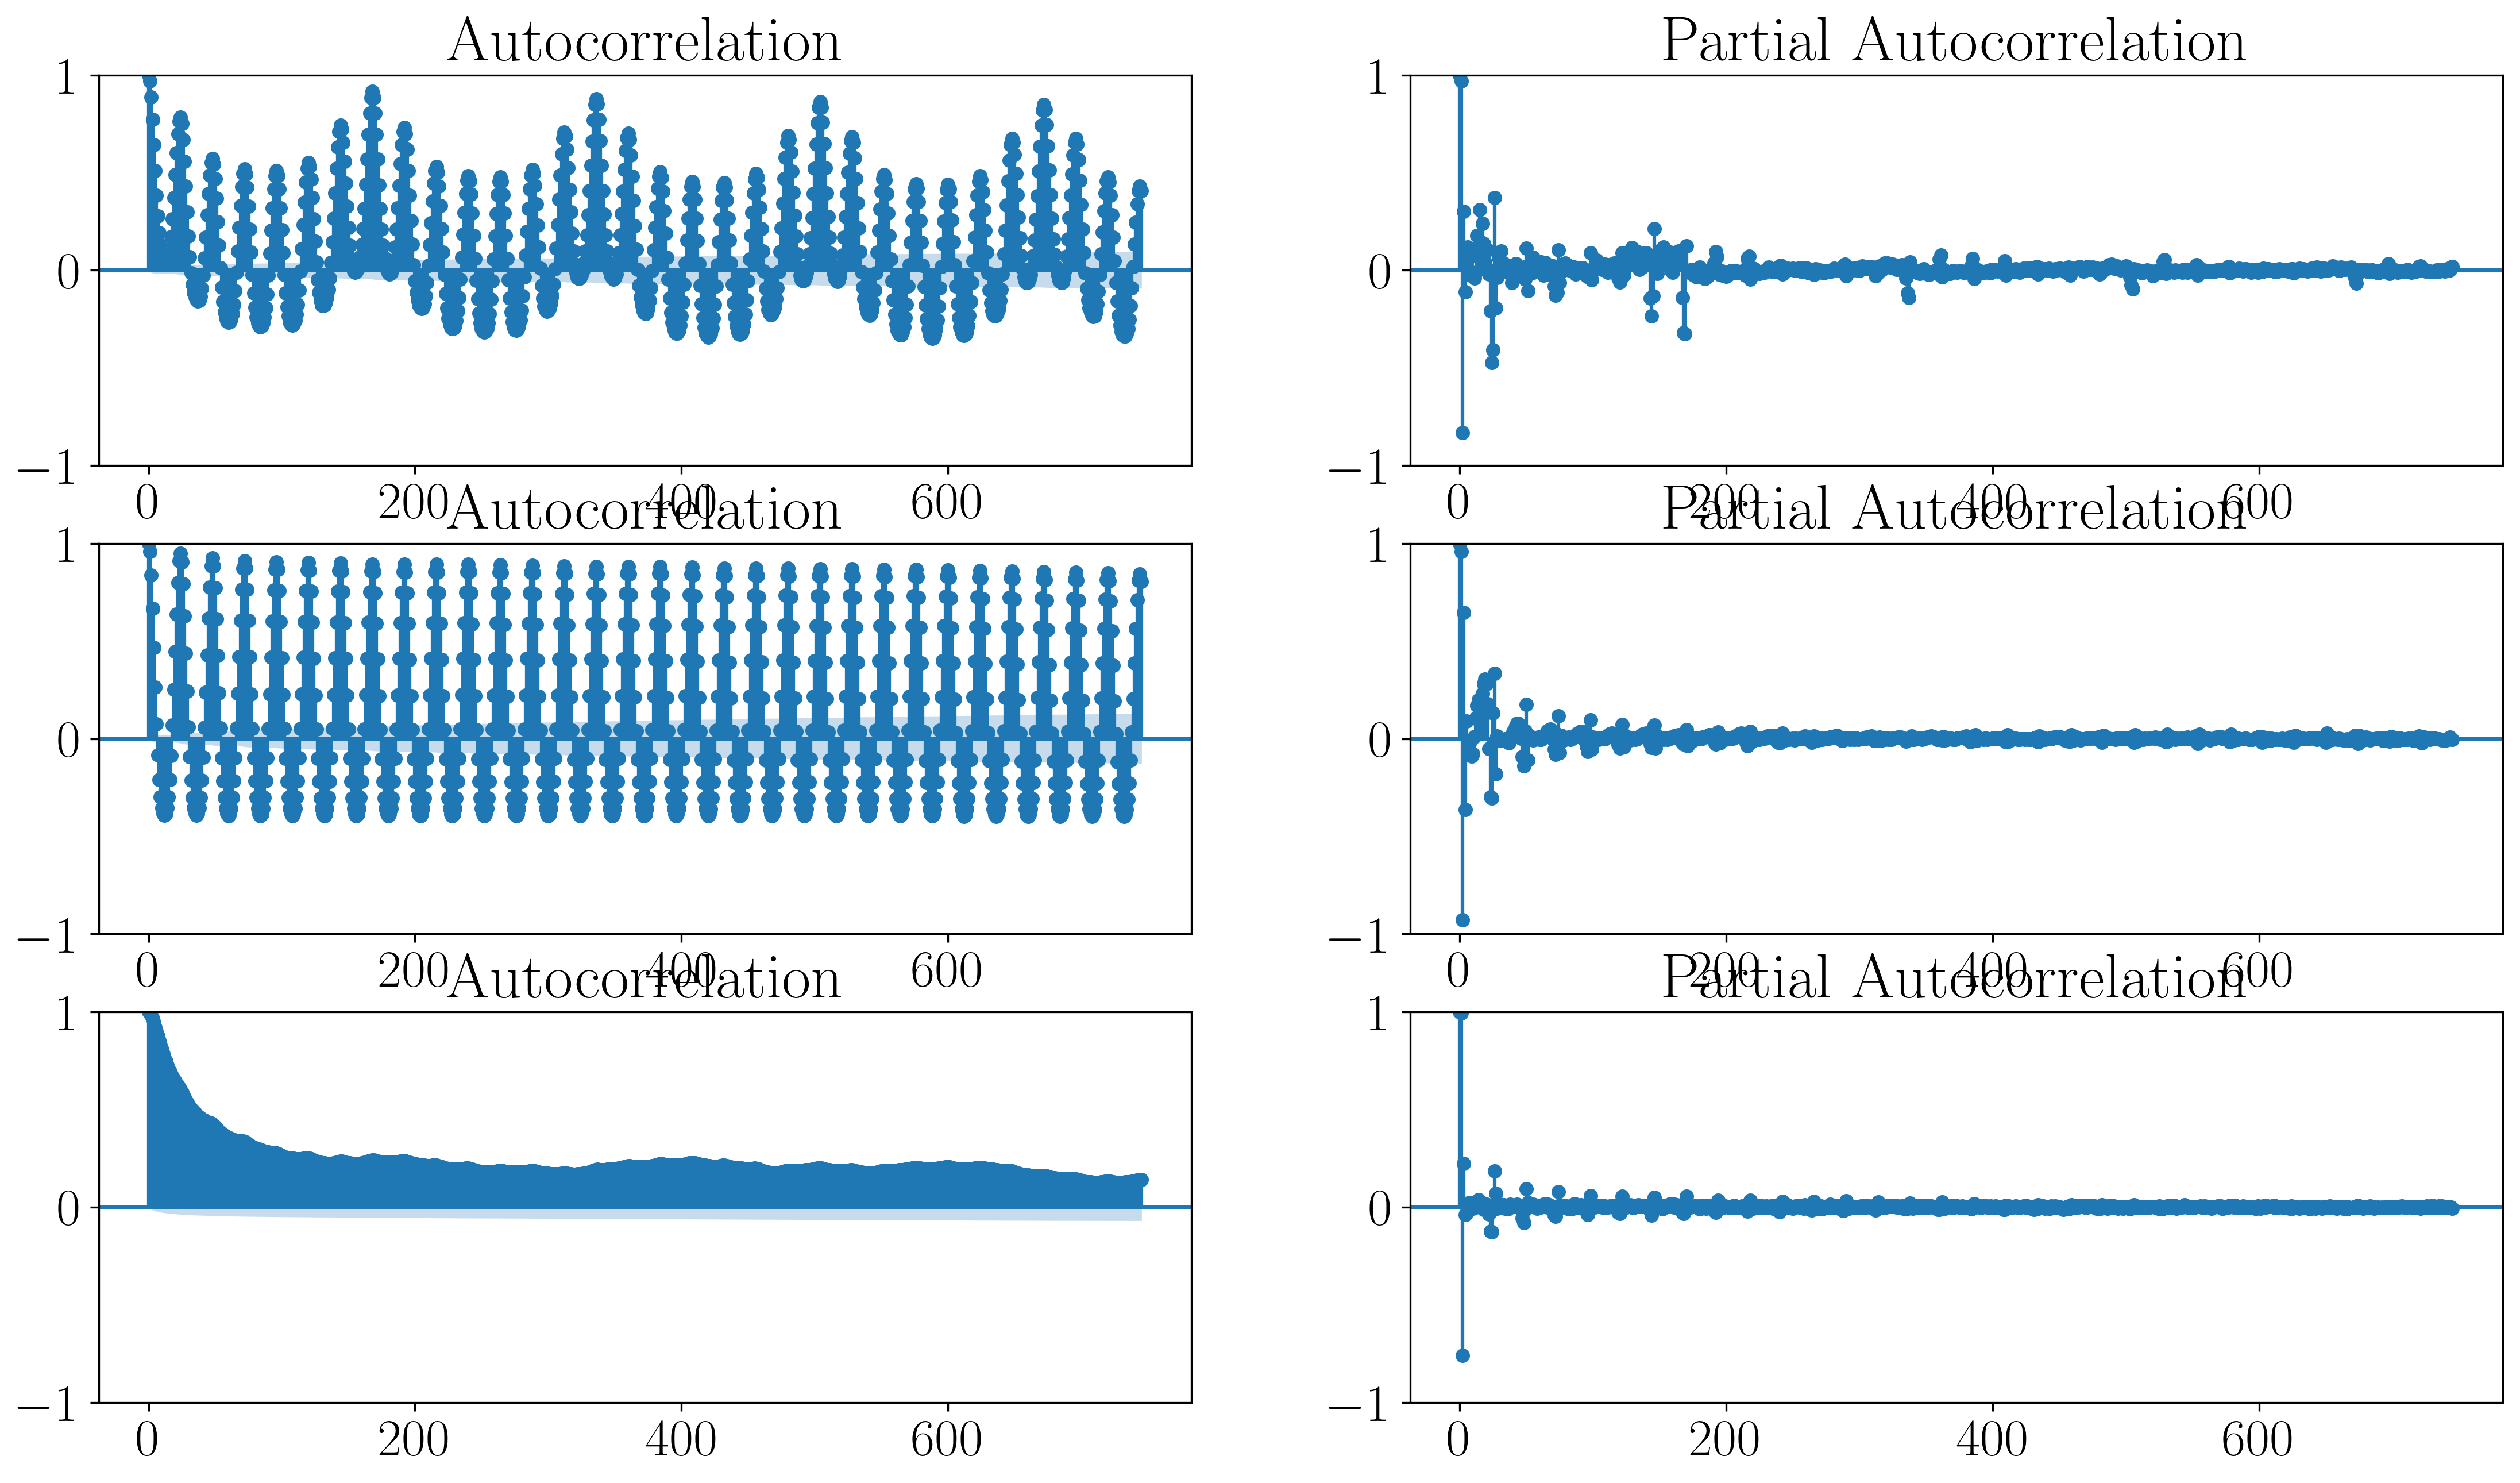

In [62]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(3, 2, figsize=(18, 10))
# Assuming df["load"].values is your time series data

for i, column in enumerate(["load", "solar_gen", "wind_gen"]):
    data = df[column].values

        # Plot ACF and PACF
    plot_acf(data, lags=24*31+1, ax=ax[i][0])  # You can adjust the number of lags as needed
    plot_pacf(data, lags=24*31+1, method='ywm', ax=ax[i][1])  # Using 'ywm' for a more robust PACF calculation
plt.show()

# Takeaway:
# load: Strong PA of longer lags, periodicity
# solar_gen: Medium PA of longer lags, periodicity
# wind_gen: Slight PA of longer lags (daily), no periodicity

# This means that the linear predictability for load > solar_gen > wind_gen


In [63]:
import numpy as np
import pandas as pd
from math import factorial, log

def permutation_entropy(time_series, m, tau):
    """Calculate the Permutation Entropy of a given time series.
    
    Parameters:
        time_series (array-like): The time series data.
        m (int): Order of permutations (embedding dimension).
        tau (int): Time delay.

    Returns:
        float: The permutation entropy.
    """
    n = len(time_series)
    permutations = {}
    factorial_m = factorial(m)
    
    # Generate all possible permutations of order m
    for i in range(n - tau * (m - 1)):
        # Extract the time-ordered pattern of length m
        sorted_index_array = np.argsort(time_series[i:i + tau * m:tau])
        pattern = tuple(sorted_index_array)
        
        if pattern in permutations:
            permutations[pattern] += 1
        else:
            permutations[pattern] = 1
    
    # Calculate the probability of each pattern
    probabilities = np.array(list(permutations.values())) / (n - tau * (m - 1))
    
    # Calculate the permutation entropy
    pe = -np.sum(probabilities * np.log(probabilities))
    return pe / log(factorial_m)

# Example usage:
# Assuming df["load"], df["solar_gen"], and df["wind_gen"] are your time series data.
# Parameters m and tau can be adjusted based on the specific characteristics of the time series.
m = 5 # Embedding dimension
tau = 1  # Time delay

load_pe = permutation_entropy(df["load"].values, m, tau)
solar_gen_pe = permutation_entropy(df["solar_gen"].values, m, tau)
wind_gen_pe = permutation_entropy(df["wind_gen"].values, m, tau)

print("Permutation Entropy of Load:", load_pe)
print("Permutation Entropy of Solar Generation:", solar_gen_pe)
print("Permutation Entropy of Wind Generation:", wind_gen_pe)

# Takeway:
# Perm Entropy is wind > load > solar for all m < 10, tau=1
# Solar is by far the lowest
# Line search for m=5 and tau=1...6 shows similar results


Permutation Entropy of Load: 0.5458439972522978
Permutation Entropy of Solar Generation: 0.329580090319037
Permutation Entropy of Wind Generation: 0.6079666559472129


In [64]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
from math import log

def svd_entropy(time_series, m, tau):
    """Calculate the SVD Entropy of a given time series.

    Parameters:
        time_series (array-like): The time series data.
        m (int): Embedding dimension.
        tau (int): Time delay.

    Returns:
        float: The SVD entropy.
    """
    # Embed the time series into a matrix
    n = len(time_series)
    if n < (m - 1) * tau + 1:
        raise ValueError("Time series is too short for the given m and tau values.")
    
    mat = np.empty((m, n - (m - 1) * tau))
    for i in range(m):
        mat[i] = time_series[i * tau:n - (m - i - 1) * tau]

    # Compute the singular values using SVD
    U, singular_values, V = svd(mat, full_matrices=False)

    # Normalize the singular values to form a probability distribution
    norm_singular_values = singular_values / np.sum(singular_values)
    
    # Compute the entropy
    entropy = -np.sum(norm_singular_values * np.log(norm_singular_values))
    return entropy

# Example usage
m = 100  # Embedding dimension
tau = 1  # Time delay

load_svd_entropy = svd_entropy(df["load"].values, m, tau)
solar_gen_svd_entropy = svd_entropy(df["solar_gen"].values, m, tau)
wind_gen_svd_entropy = svd_entropy(df["wind_gen"].values, m, tau)

print("SVD Entropy of Load:", load_svd_entropy)
print("SVD Entropy of Solar Generation:", solar_gen_svd_entropy)
print("SVD Entropy of Wind Generation:", wind_gen_svd_entropy)


SVD Entropy of Load: 1.8728741322872857
SVD Entropy of Solar Generation: 2.905209085522905
SVD Entropy of Wind Generation: 2.655766242365638


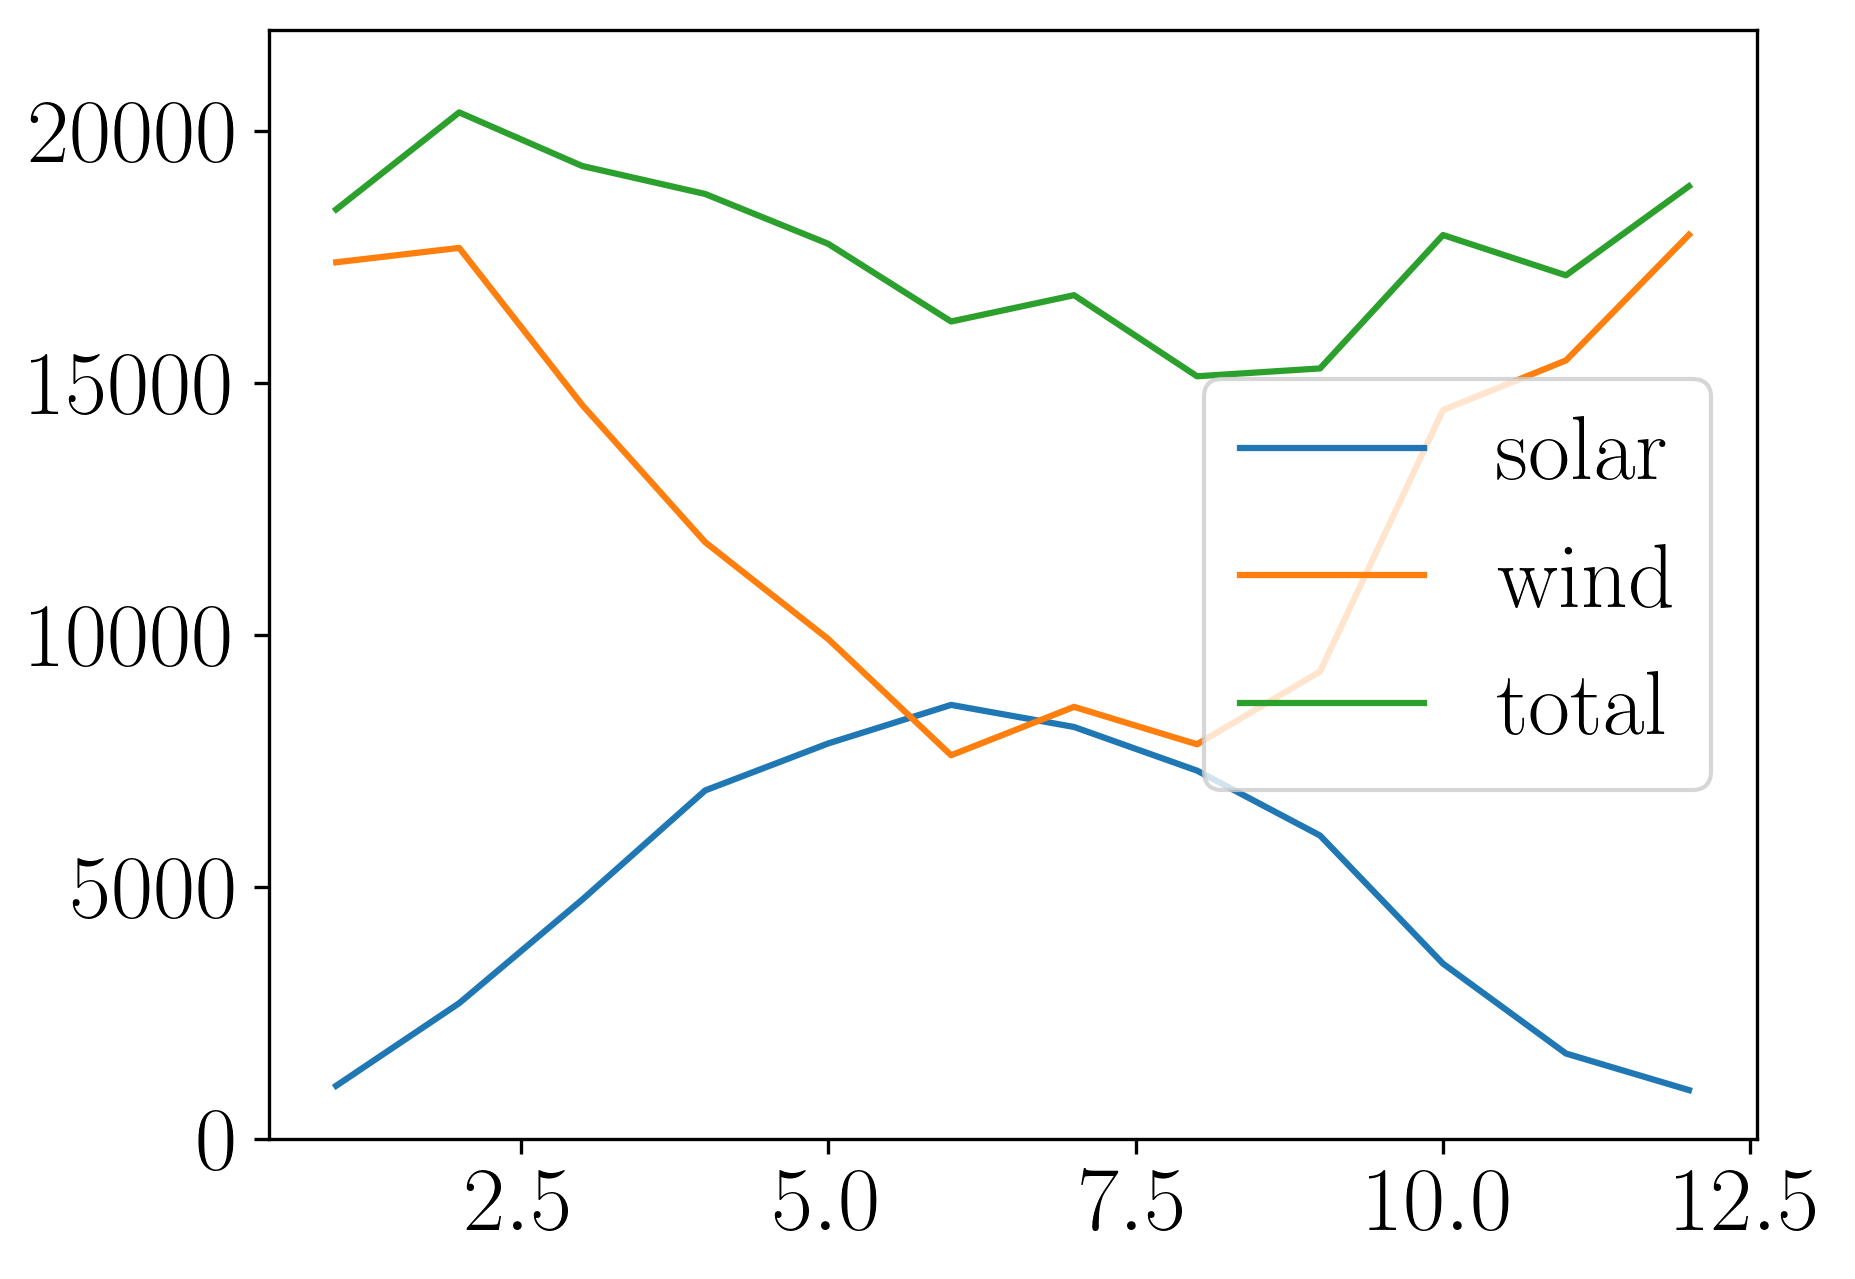

In [65]:
# plot
means_solar = df["solar_gen"].groupby(df["date"].dt.month).mean()
means_wind = df["wind_gen"].groupby(df["date"].dt.month).mean()

plt.plot(means_solar, label="solar")
plt.plot(means_wind, label="wind")
plt.plot(means_solar+means_wind, label="total")
plt.ylim(0, 22000)
plt.legend()

# Dunkelflaute in autumn (less sun but not yet a lot of wind)

(0.0, 65000.0)

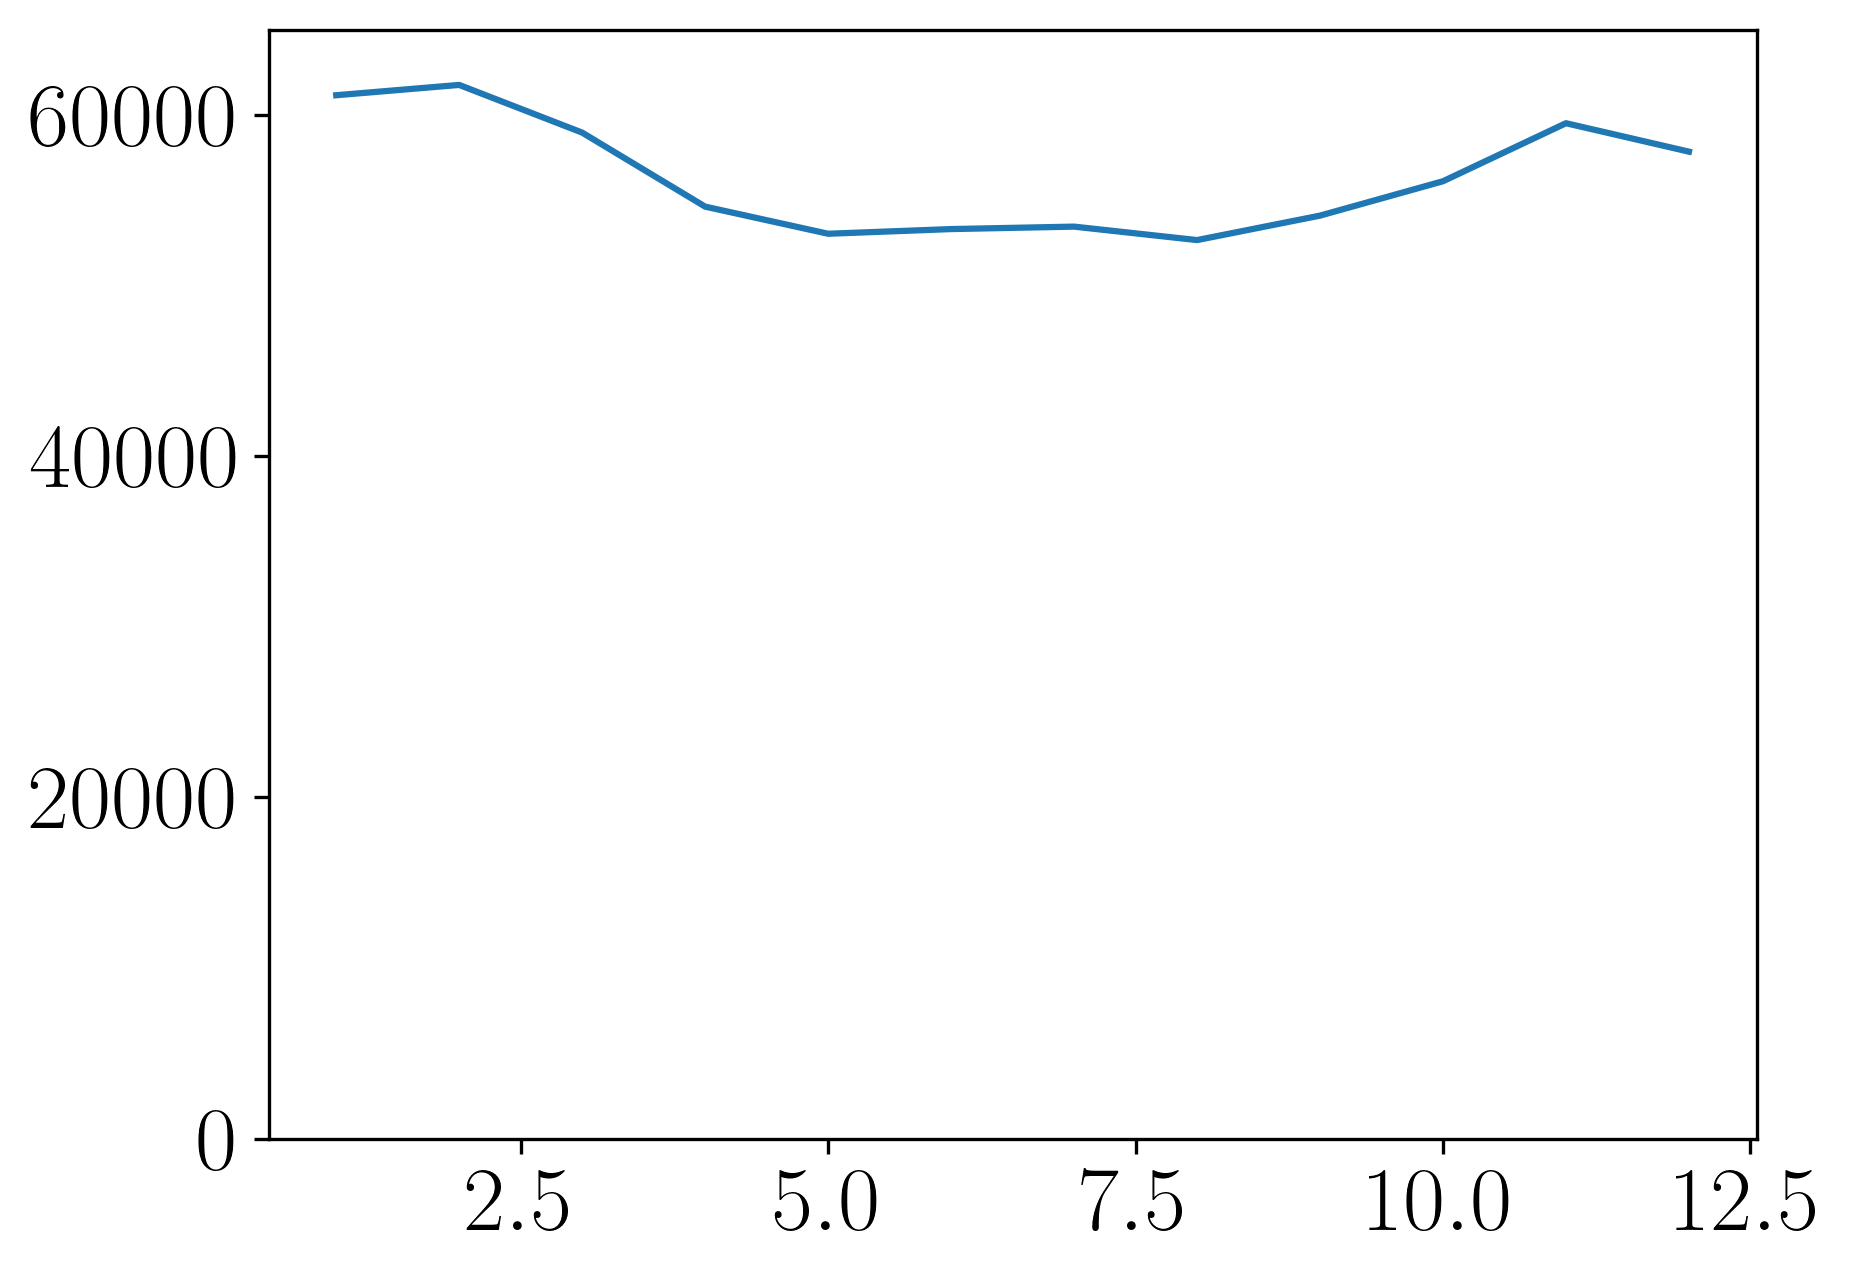

In [66]:
means_load = df["load"].groupby(df["date"].dt.month).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

In [67]:
#means = df["hydro_storage_gen"].groupby(df["date"].dt.month).mean()
#plt.plot(means)

(0.0, 65000.0)

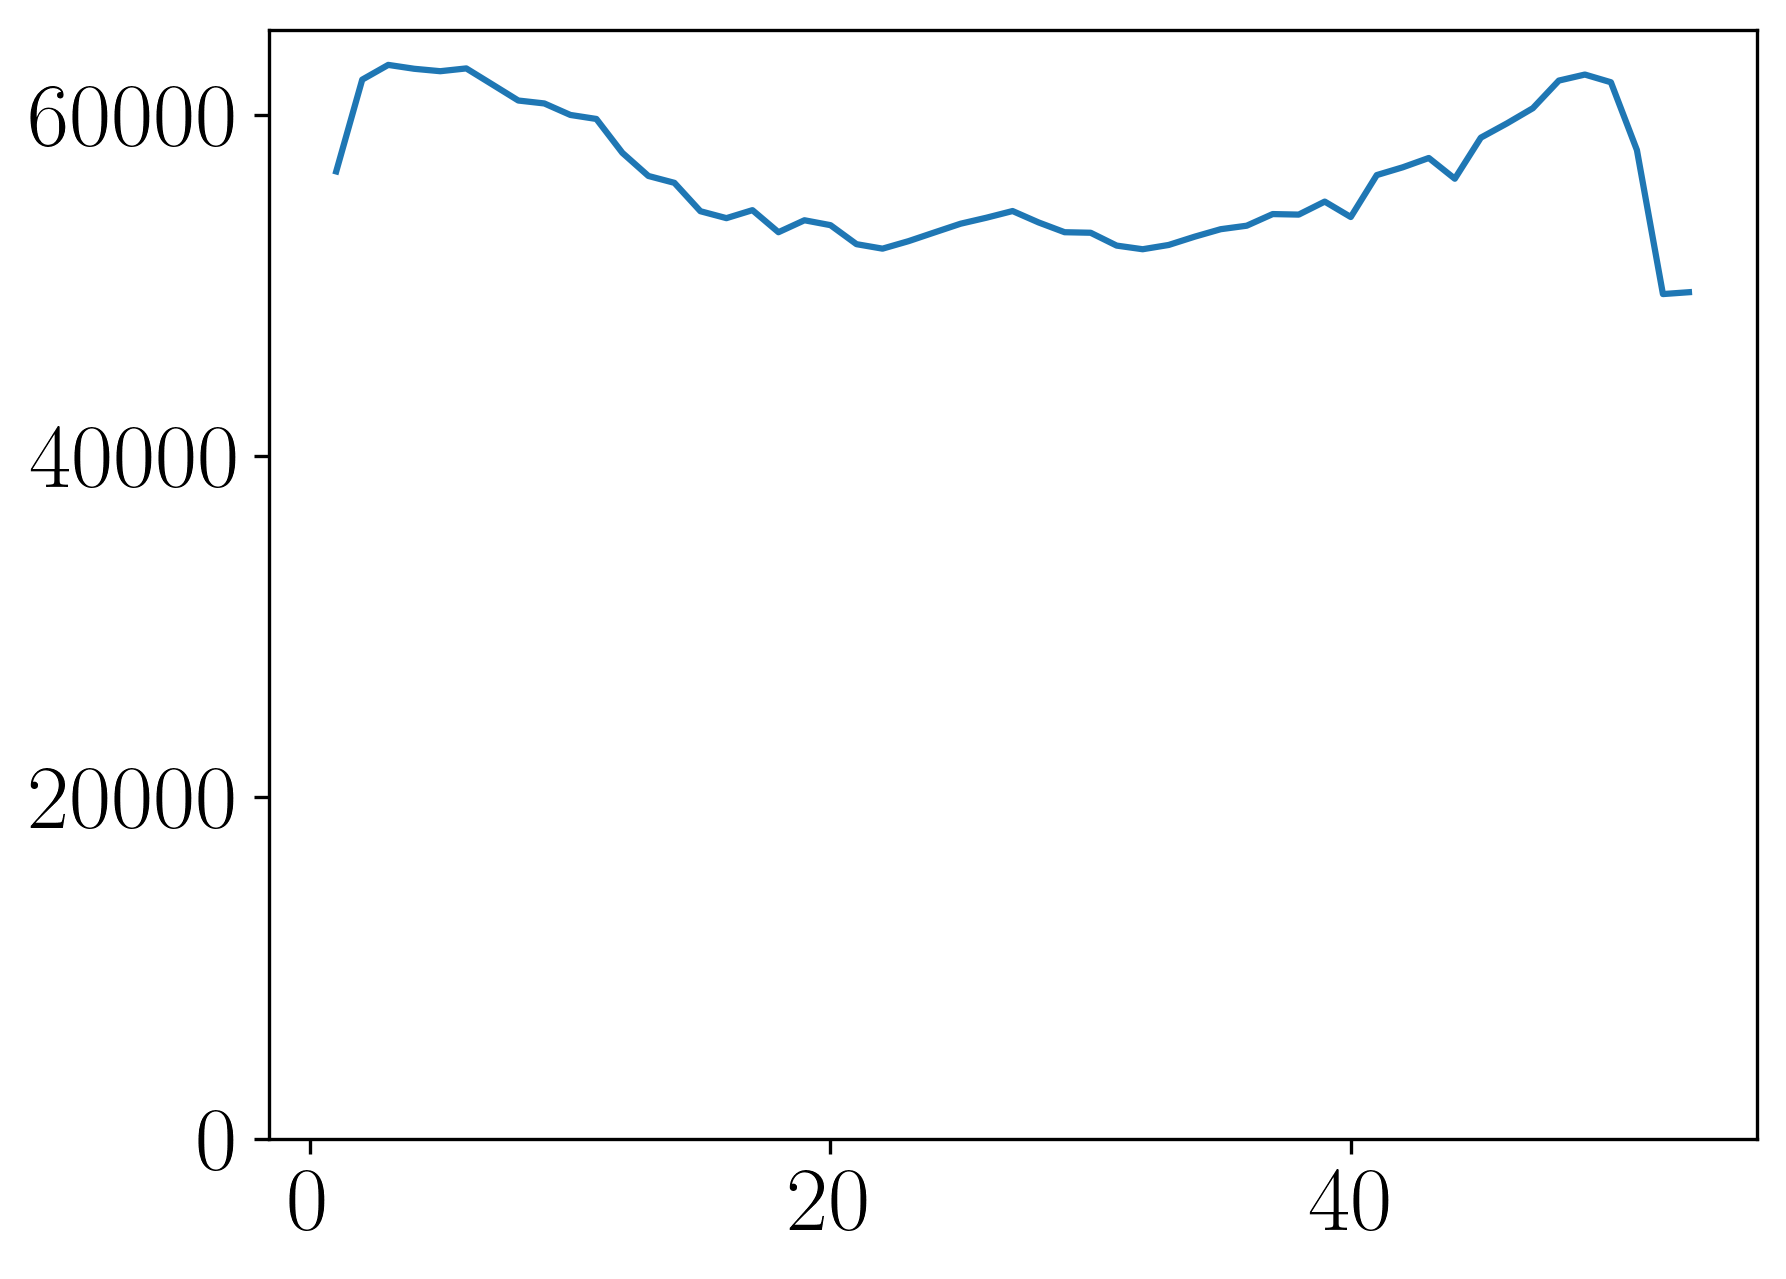

In [68]:
means_load = df["load"].groupby(df["date"].dt.isocalendar().week).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

(0.0, 65000.0)

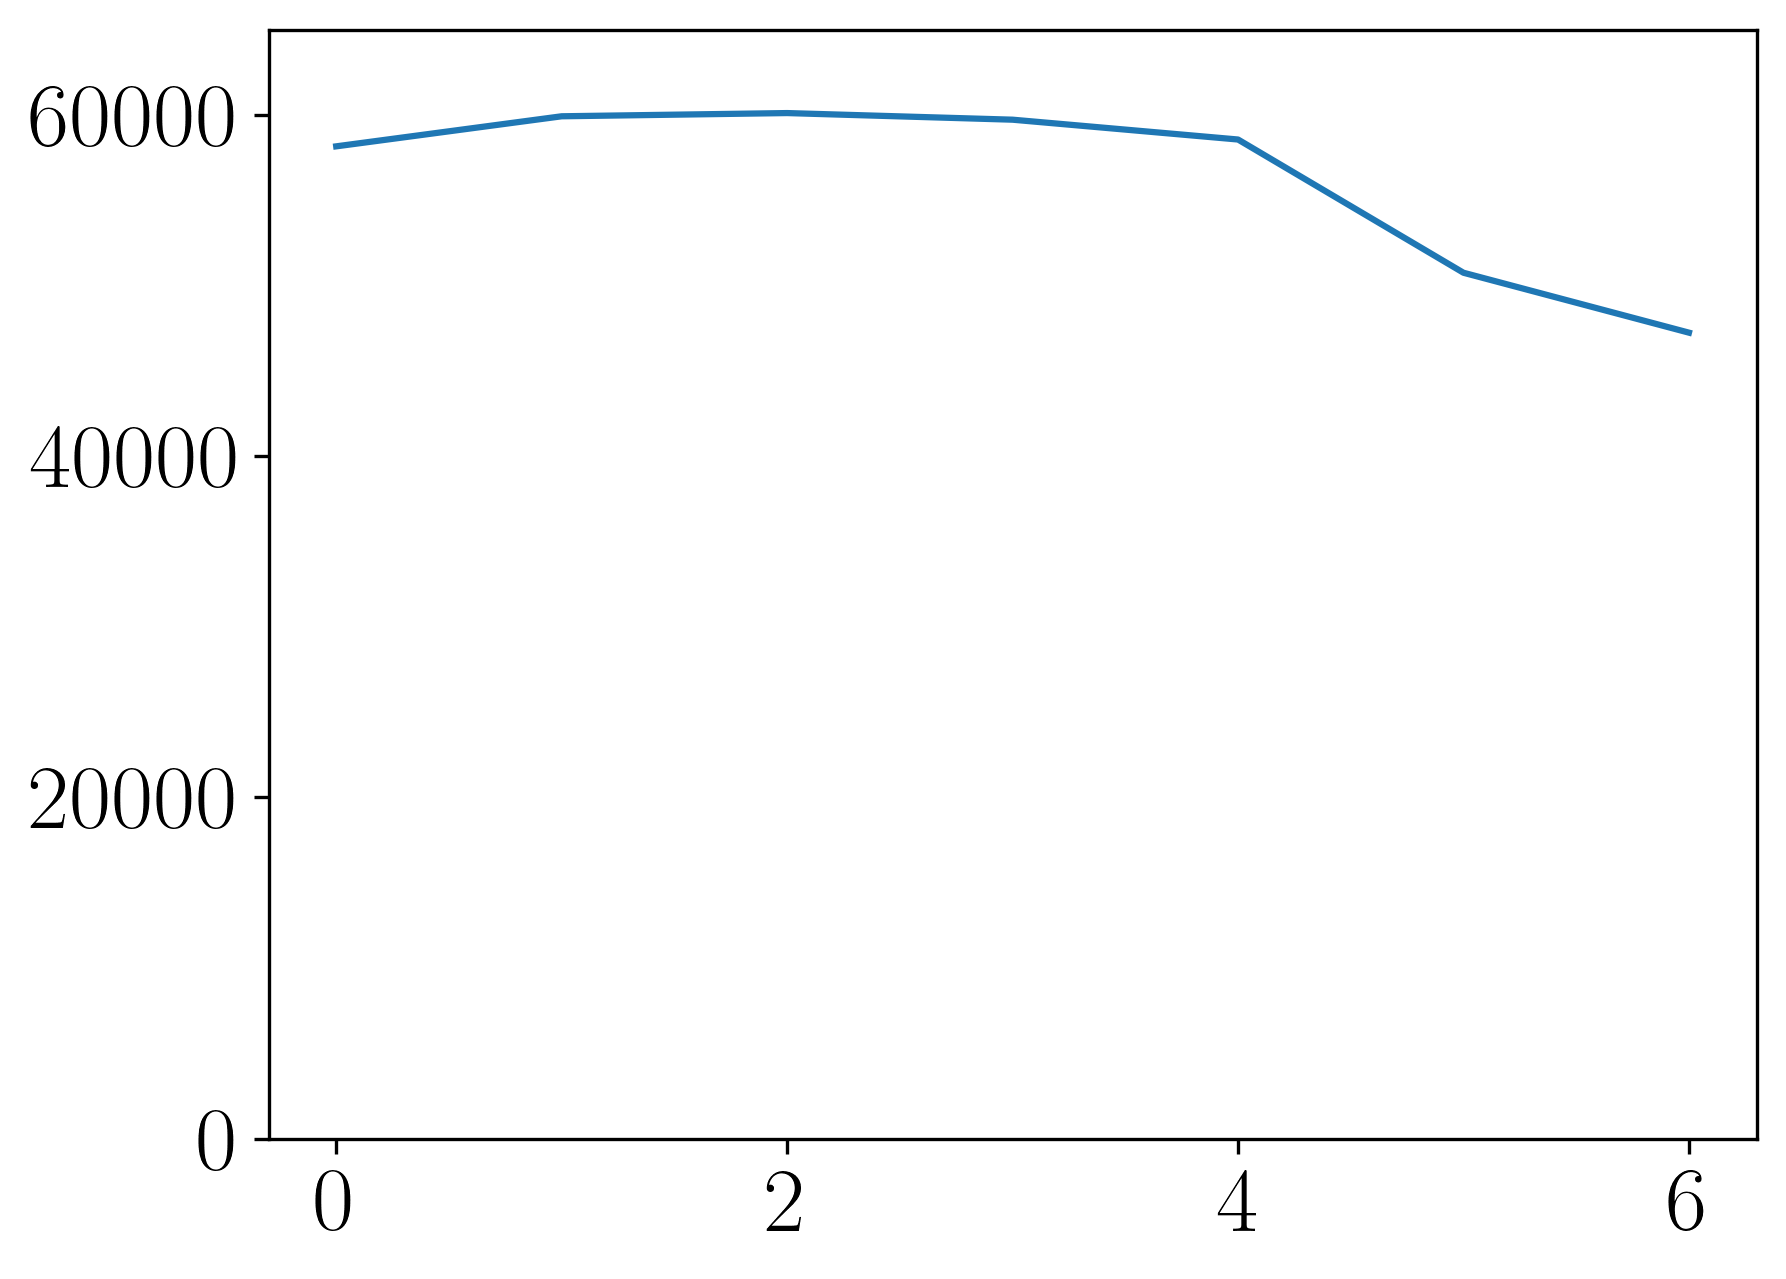

In [69]:
means_load = df["load"].groupby(df["date"].dt.dayofweek).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)

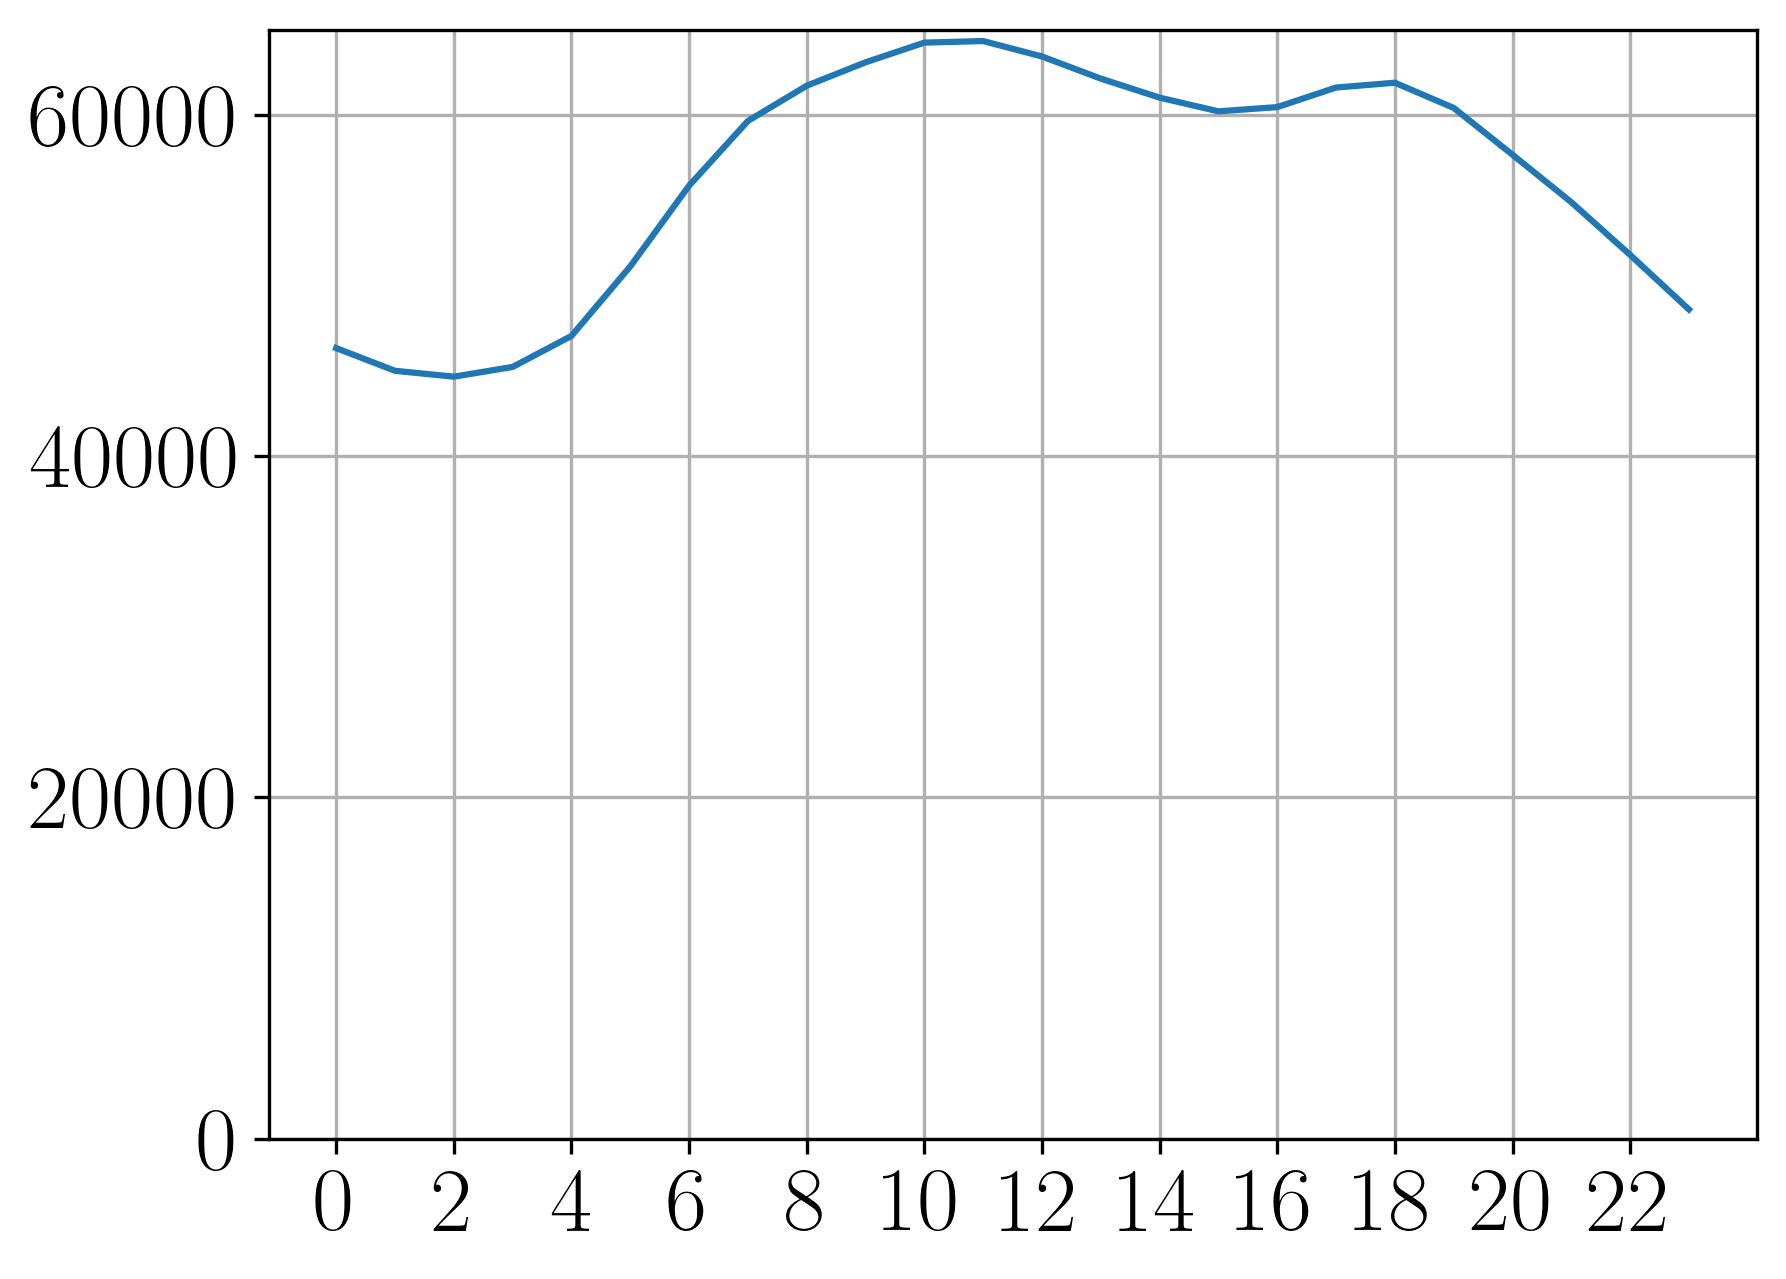

In [70]:
means_load = df["load"].groupby(df["date"].dt.hour).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 65000)
plt.xticks(np.arange(0, 24, 2))
plt.grid()

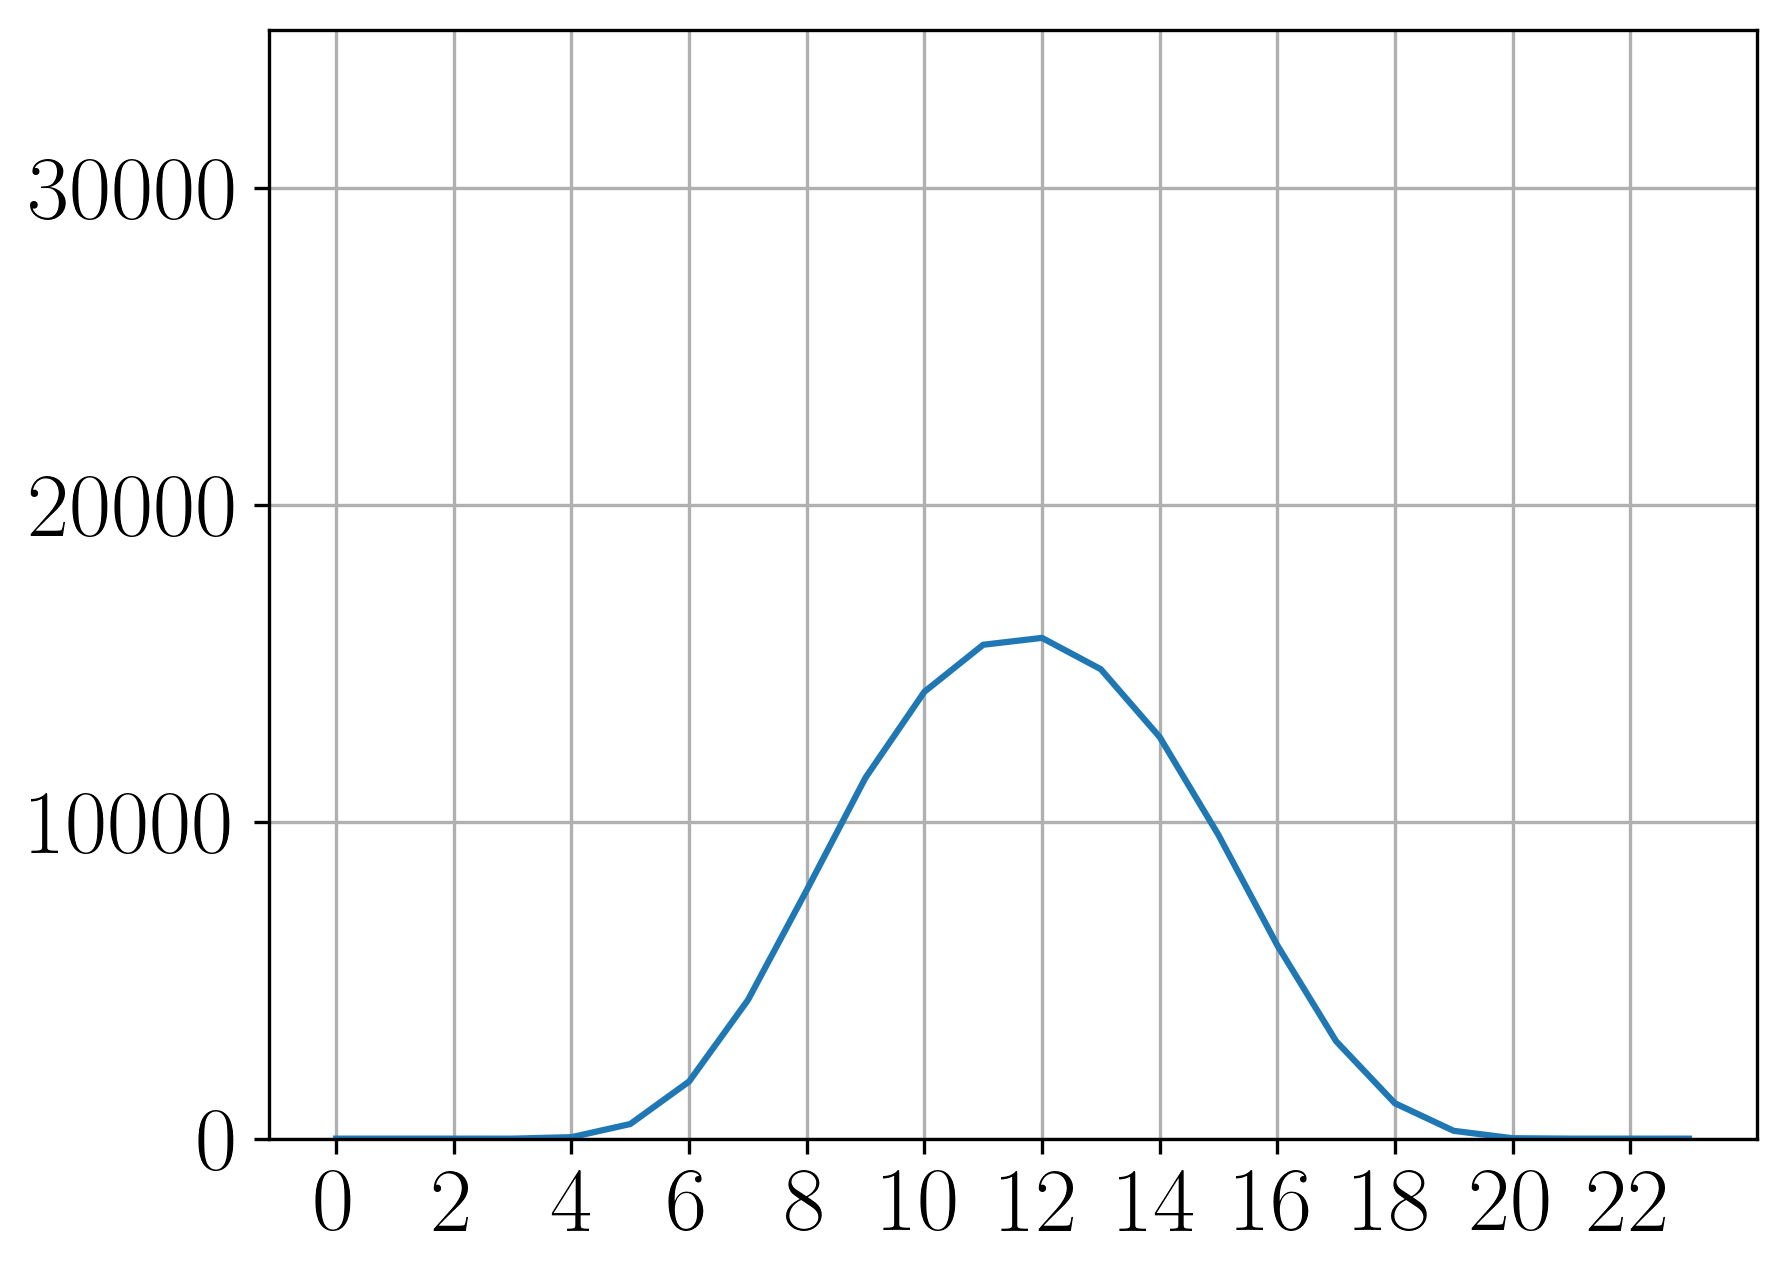

In [71]:
means_load = df["solar_gen"].groupby(df["date"].dt.hour).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 35000)
plt.xticks(np.arange(0, 24, 2))
plt.grid()

# Wind gen

(0.0, 18000.0)

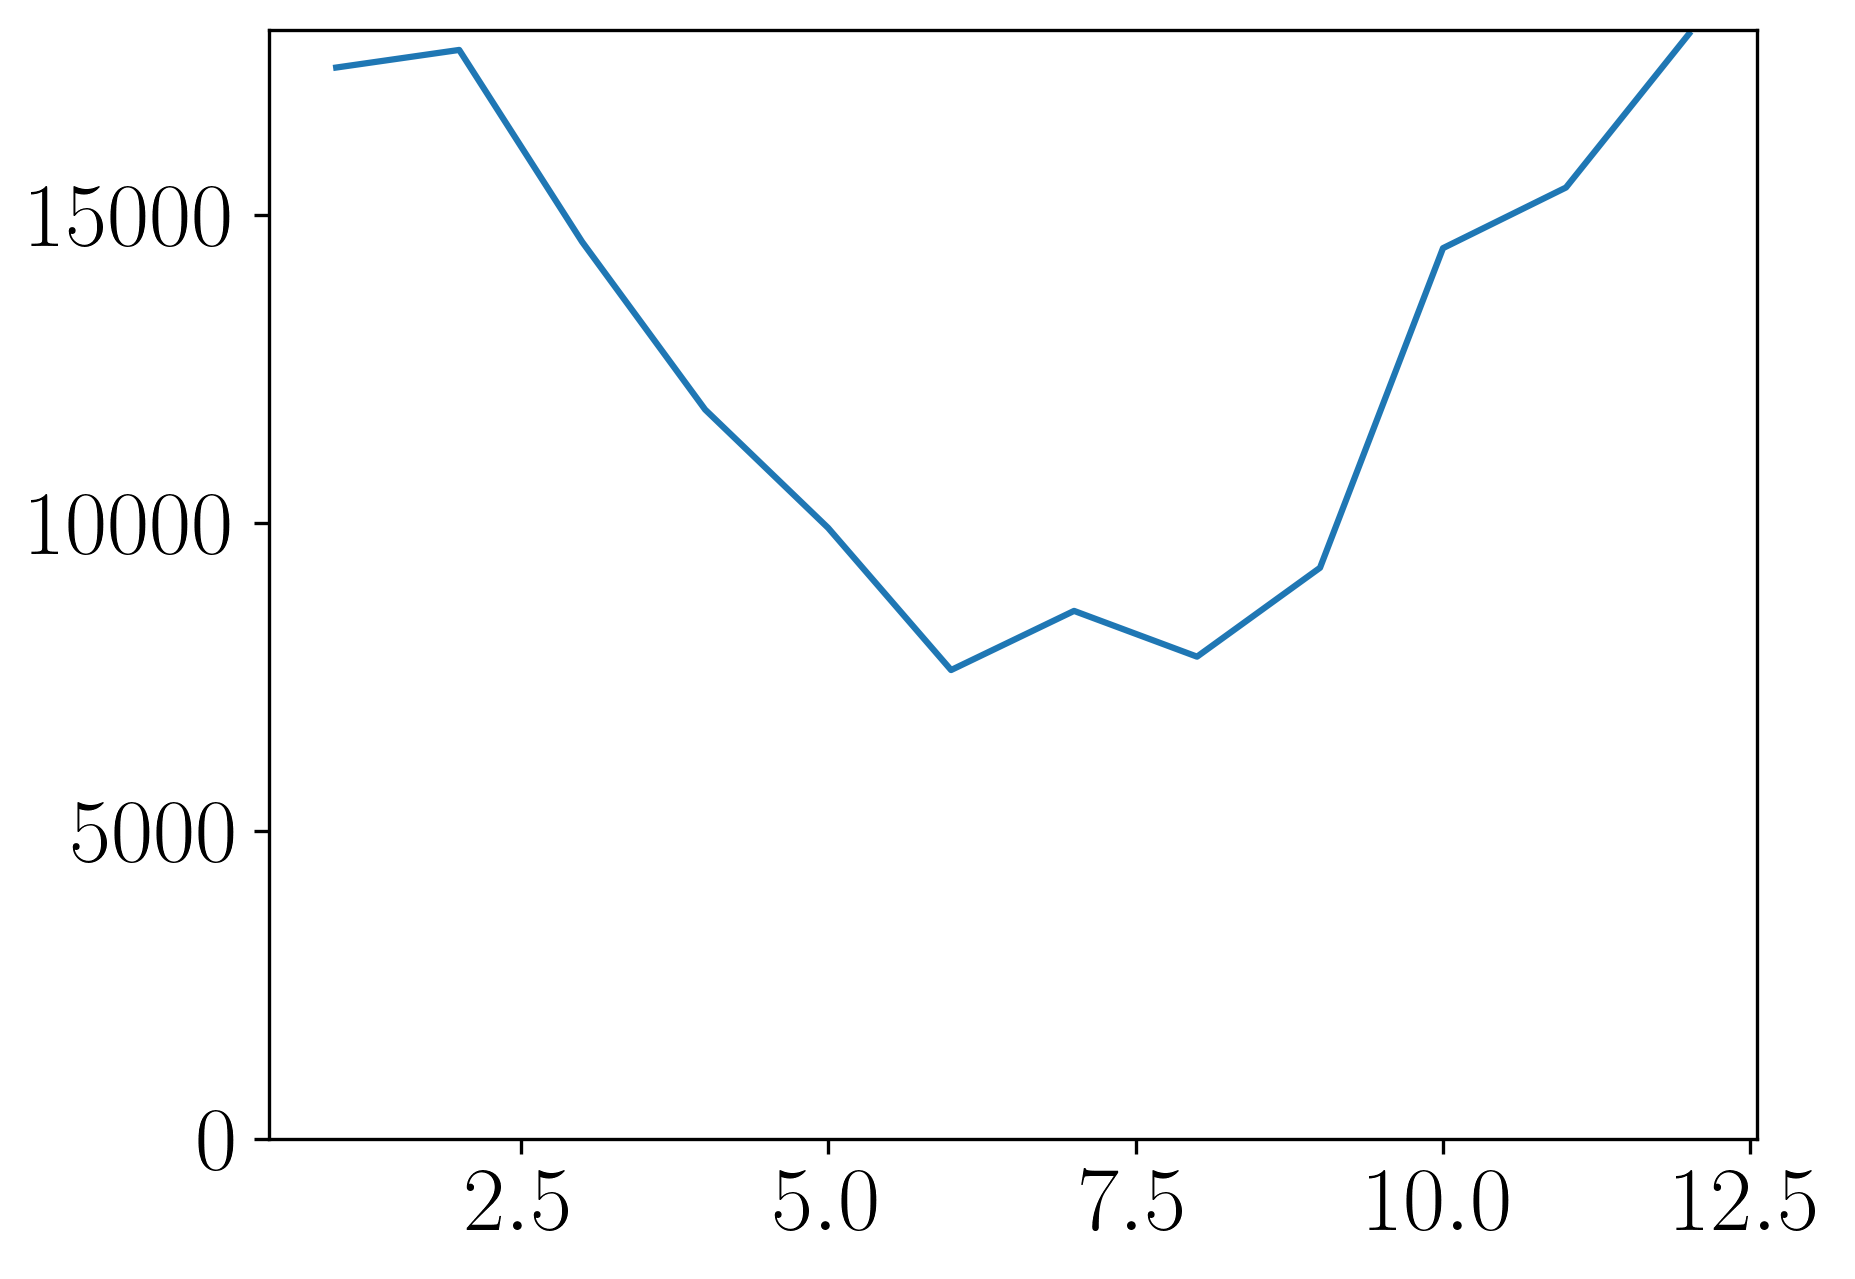

In [72]:
means_load = df["wind_gen"].groupby(df["date"].dt.month).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 18000)

(0.0, 18000.0)

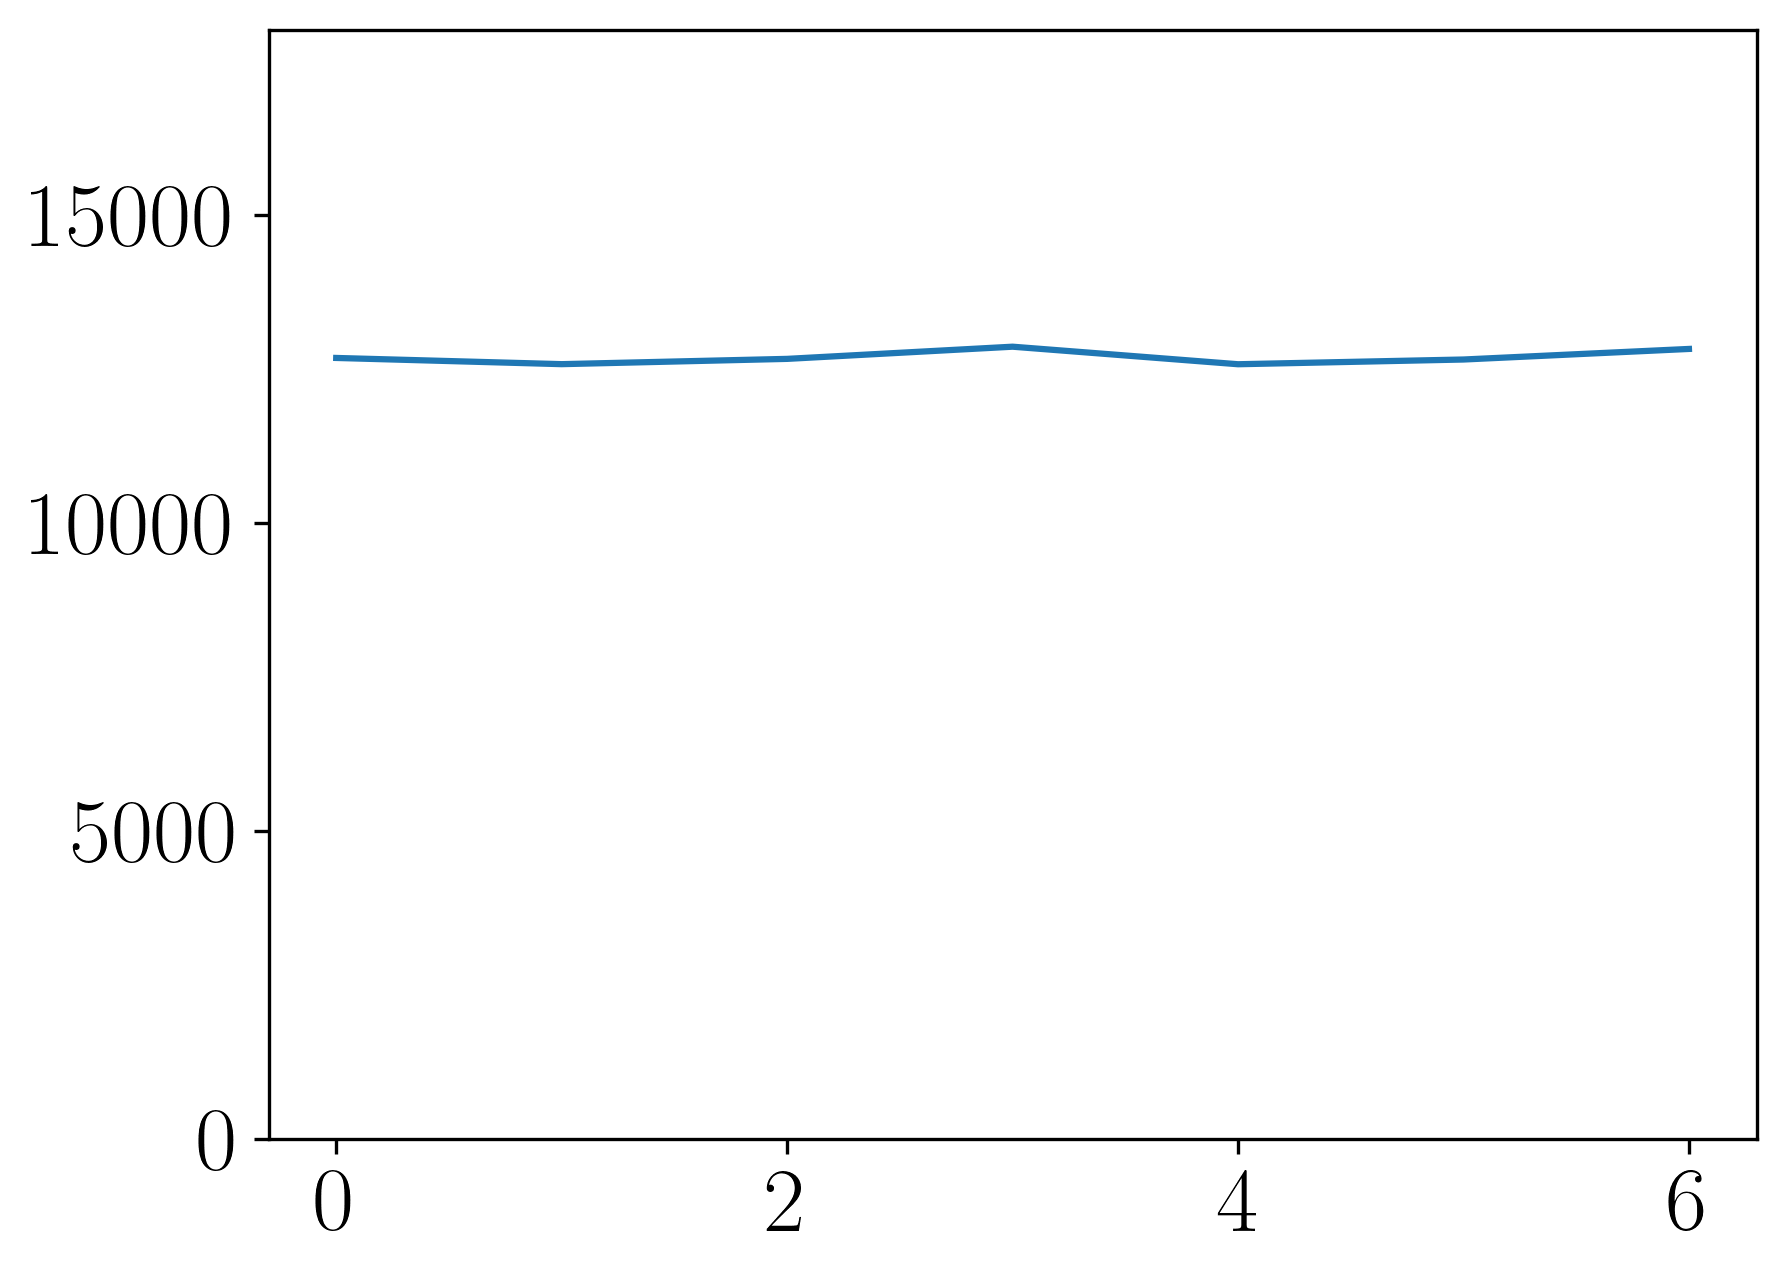

In [73]:
means_load = df["wind_gen"].groupby(df["date"].dt.dayofweek).mean()
plt.plot(means_load, label="load")
plt.ylim(0, 18000)

(0.0, 18000.0)

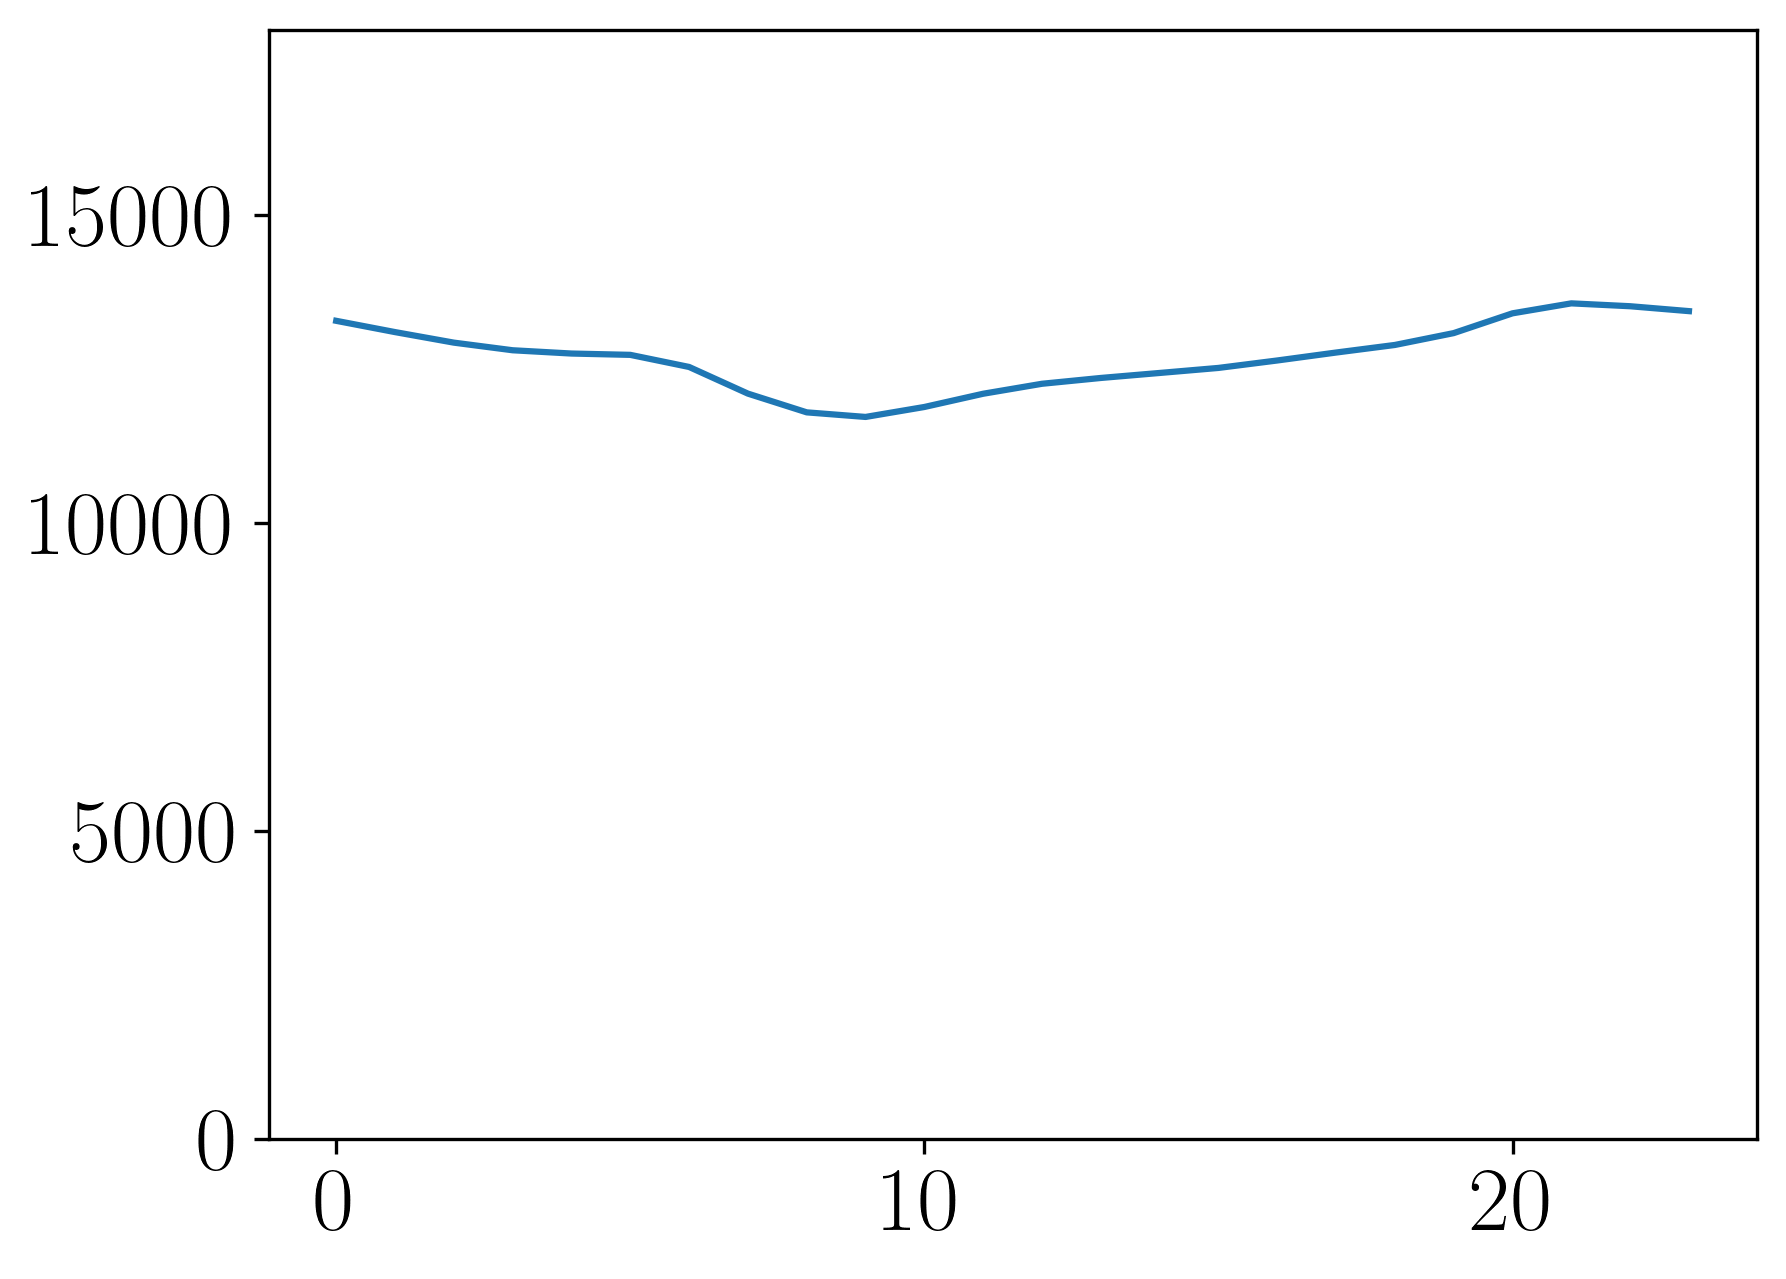

In [74]:
means_load = df["wind_gen"].groupby(df["date"].dt.hour).mean()
plt.plot(means_load, label="wind_gen")
plt.ylim(0, 18000)

In [ ]:
# plot 
means = df["wind_gen"].groupby(df["date"].dt.year).mean()
plt.plot(means)


In [ ]:
means = df["solar_gen"].groupby(df["date"].dt.year).mean()
plt.plot(means)

In [ ]:
means = df["load"].groupby(df["date"].dt.year).mean()
plt.plot(means)